<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit14_Introduction_to_Deep_Reinforcement_Learning_on_Google_Colab_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปี 2013 บริษัทสตาร์ทอัพในลอนดอนชื่อ DeepMind ได้ตีพิมพ์ Paper ชื่อ Playing Atari with Deep Reinforcement Learning ซึ่งแสดงให้เห็นว่า AI Agent สามารถควบคุมการเล่นเกมอย่างเช่น Breakout, Enduro และ Pong จนเอาชนะมนุษย์ได้เพียงแค่รับ Input เป็น Screen Pixel ในการฝึกสอน โดยในขณะที่ฝึกจะมีการให้รางวัล (Reward) เพื่อให้ AI เรียนรู้ว่ามันทำได้ดี

ซึ่งคะแนนที่ AI ของ DeepMind (DQN) ทำได้ในแต่ละเกม แสดงดังตารางด้านล่างนี้ครับ

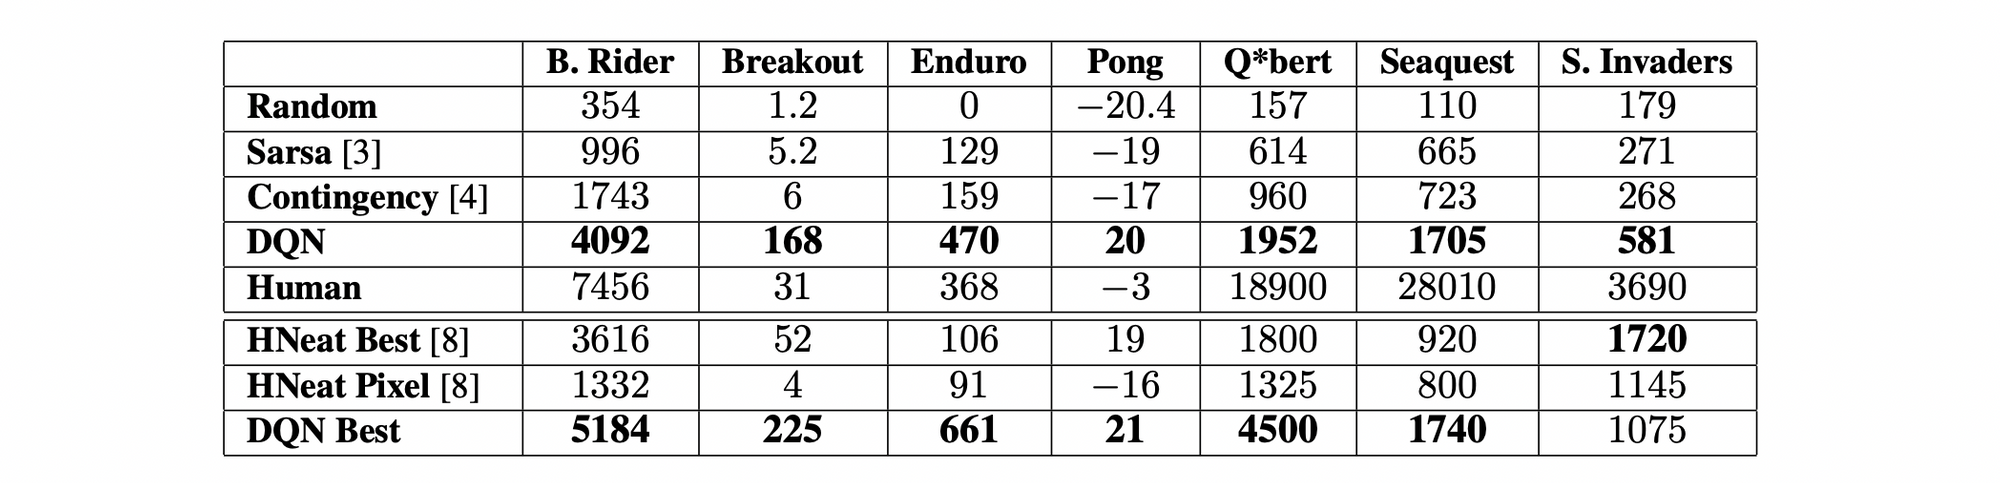

ในบทความนี้ ผู้อ่านจะได้ฝึก AI Agent ให้เล่มเกม Pong หรือ Table Tennis ซึ่งเป็นหนึ่งใน Arcade Game ของ Gym Framework จาก OpenAI ที่ถูกก่อตั้งโดย Elon Musk (หนึ่งในผู้ก่อตั้ง)

โดยเราจะให้ AI Agent เรียนรู้การเล่นเกมด้วย Deep Q-Network (DQN) ที่เป็น Deep Learning Model เช่นเดียวกับที่ DeepMind ได้ใช้ฝึกสอน AI

[ตัวอย่าง](https://blog.pjjop.org/content/images/2021/03/openaigym.video.5.72.video000000_1.gif)

แต่ก่อนที่ AI Agent จะมีความสามารถในการตัดสินใจในสถานการณ์ต่างๆ ได้ดี ช่วงแรกมันจะต้องมีการลองผิดลองถูกในจำนวนที่มากพอ (Exploration) โดยการสุ่มเลือก Action แล้วเรียนรู้จากผลลัพธ์ที่เกิดขึ้น (State และ Reward)

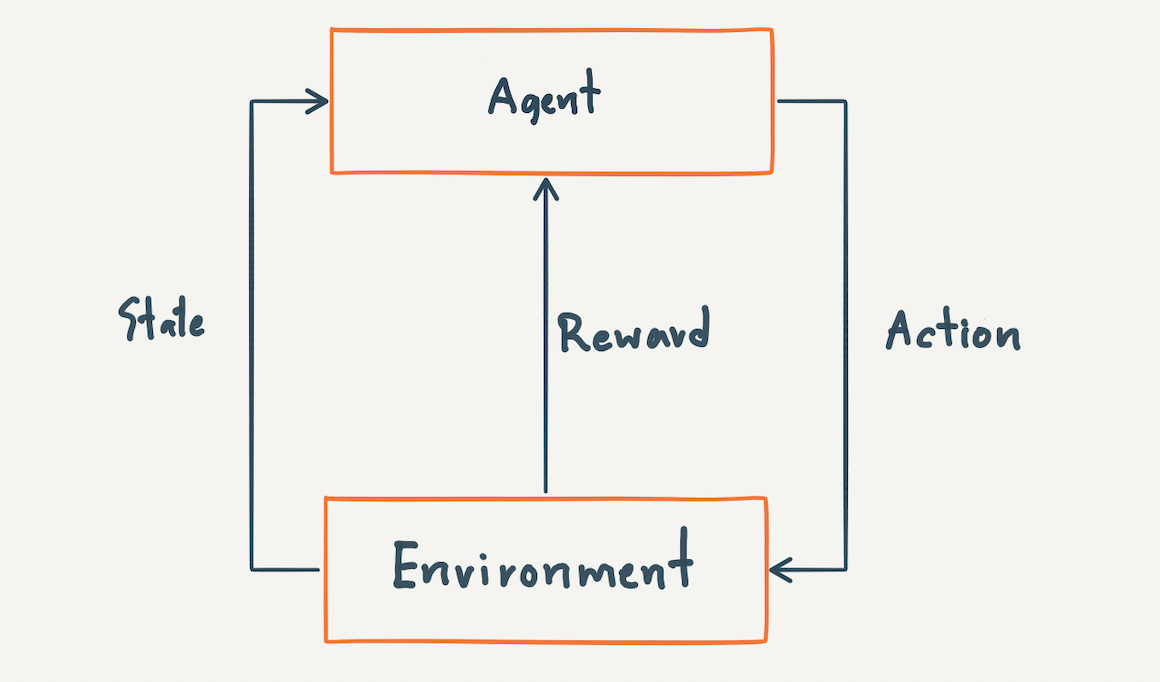

ผู้เขียน Train AI Agent ด้วย 4vCPU Intel(R) Xeon(R) @ 2.20GHz และ Tesla P100 บน Google Colab Pro ทั้งหมด 700 เกม เป็นเวลากว่า 16 ชั่วโมง จนกระทั่งหมดโควต้าการใช้งาน GPU โดยมีการเรียนรู้จาก Screen Pixel ทั้งสิ้นกว่า 1.5 ล้าน Frame

#Q-Table Learning

ก่อนจะฝึกสอน AI Agent ด้วย DQN เราจะทำความเข้าใจแนวคิดสำคัญที่อยู่เบื้องหลังมันเสียก่อน นั่นคือ Q-Table Learning Algorithm

โดย Q-Table Learning นั้นเป็น Reinforcement Learning Algorithm สำหรับการประมาณค่า Action Values หรือ Q-values ซึ่งก็คือผลรวมของรางวัลที่ AI Agent น่าจะได้รับในอนาคต เมื่อมีการเปลี่ยนจาก State หนึ่งไปยังอีก State หนึ่ง

เพื่อให้มันบรรลุเป้าหมายตามภารกิจที่กำหนดไว้ AI Agent จะเลือก Action ซึ่งมีผลรวมของรางวัลที่น่าจะได้รับในอนาคต (Q-values) มากที่สุด

##FrozenLake Environment

เราจะทดลองคำนวณ Q-values ด้วยการให้ AI Agent แก้ปัญหา FrozenLake (Environment หนึ่งของ Gym Framework)



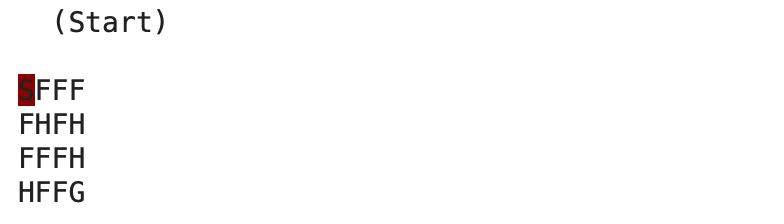

โดย FrozenLake Environment จะประกอบด้วย Grid Block ขนาด 4x4 (16 State) 4 ประเภท ได้แก่ Start Block (S), Frozen Block (F), Hole Block (H) และ Goal Block (G)

เป้าหมายของ AI Agent คือการเดินทางจาก Start Block ไปยัง Goal Block ด้วยการ Move Up, Move Down, Move Left หรือ Move Right โดยห้ามผ่านไปบน Hole Block

ทุกๆ Step ของการเดิน AI Agent จะได้ Reward เท่ากับ 0 ยกเว้นเมื่อมันเดินทางไปถึง Goal Block ซึ่งจะได้ Reward เท่ากับ 1 นอกจากนี้ FrozenLake Environment จะจบ Episode และ Return สถานะ Done เท่ากับ True เมื่อ AI Agent เดินไปบน Hole Block หรือเดินถึง Goal Block

เพื่อให้เห็นภาพของการแก้ปัญหา FrozenLake Environment มากยิ่งขึ้น ผู้เขียนจะใช้ Google Colab Pro ในการรัน Code ตามขั้นตอนดังนี้

ไปที่ Google Colab แล้วคลิ๊ก NEW NOTEBOOK

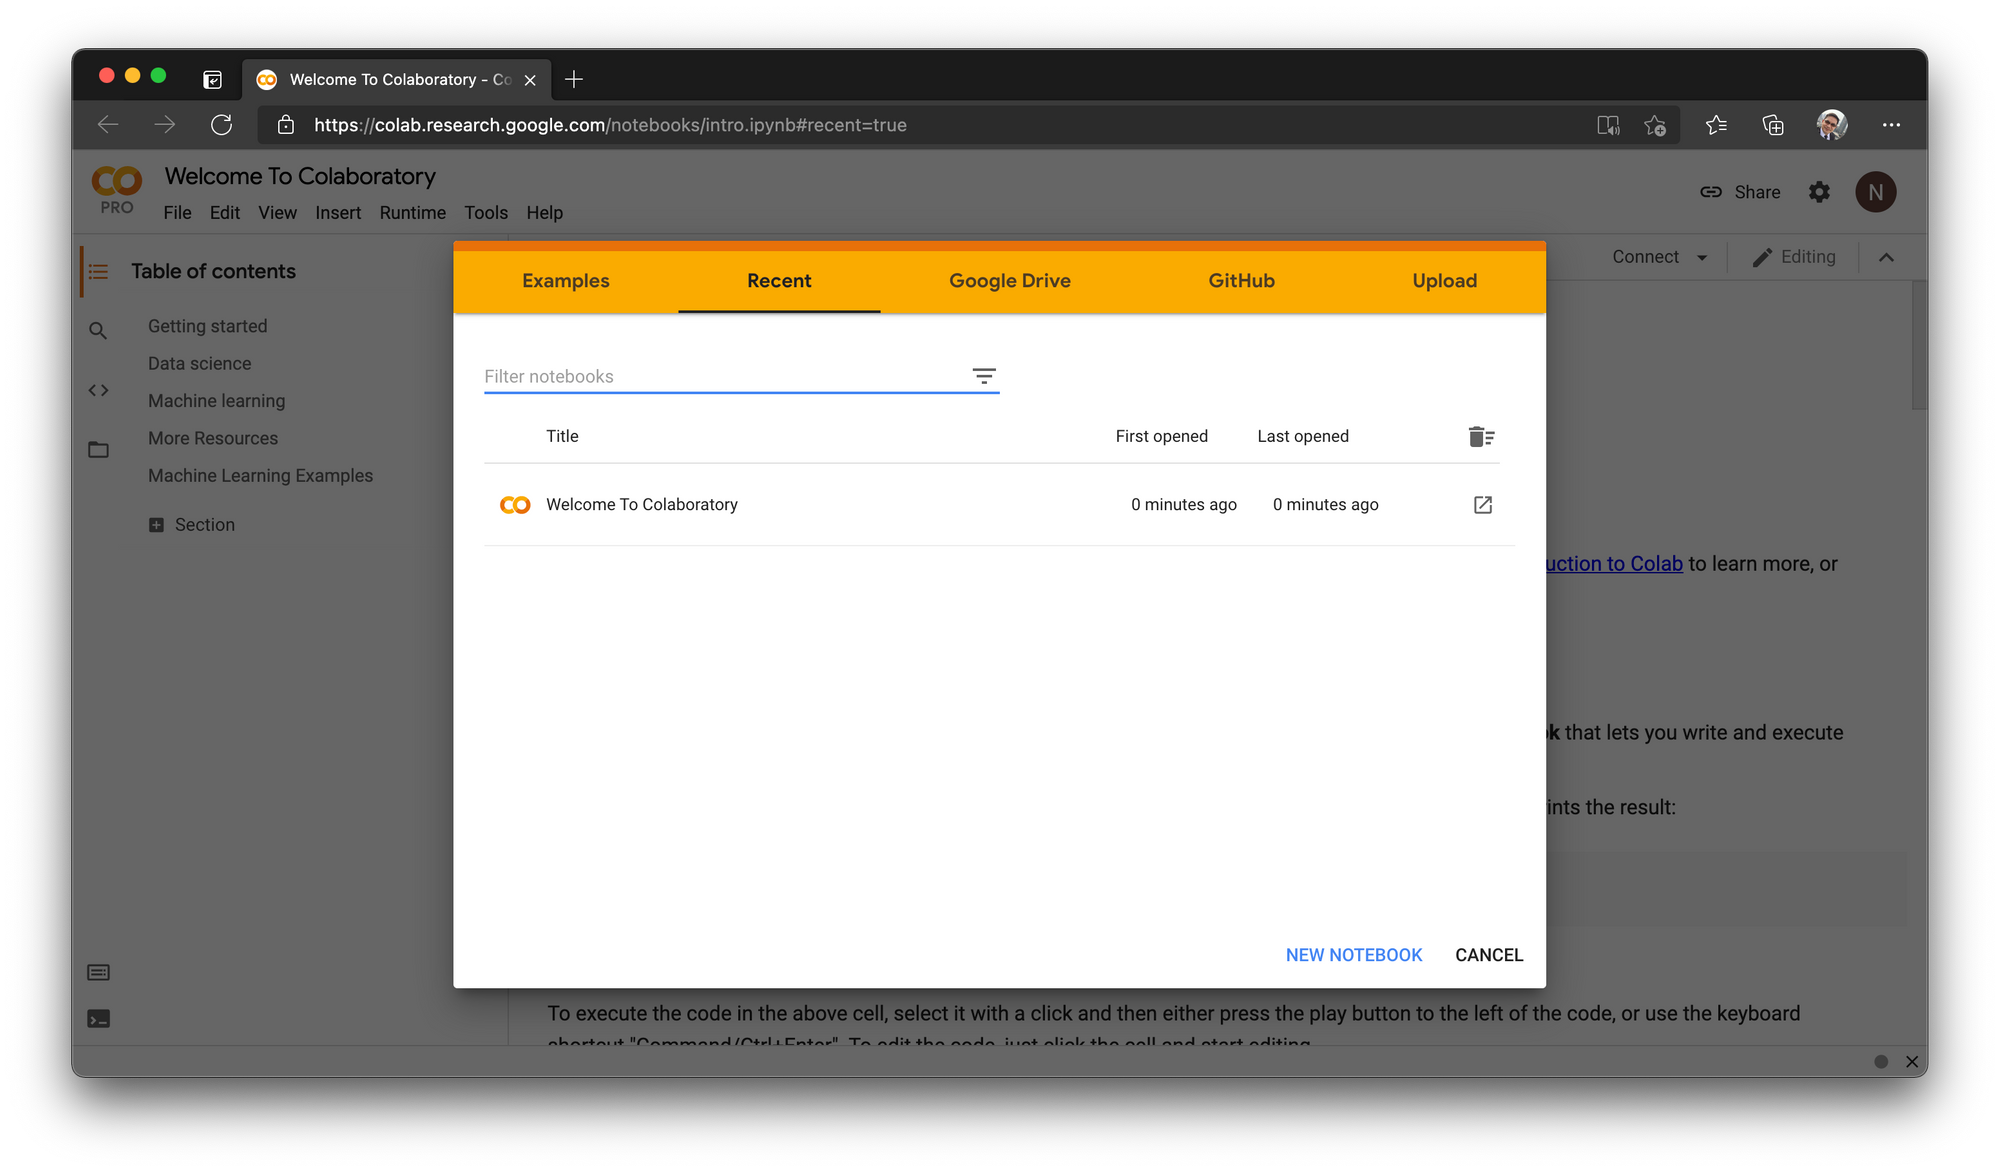

คลิ๊กที่ Untitled0.ipynb ตั้งชื่อไฟล์เป็น q-values.ipynb แล้วเลือกเมนู Runtime -> Change runtime type

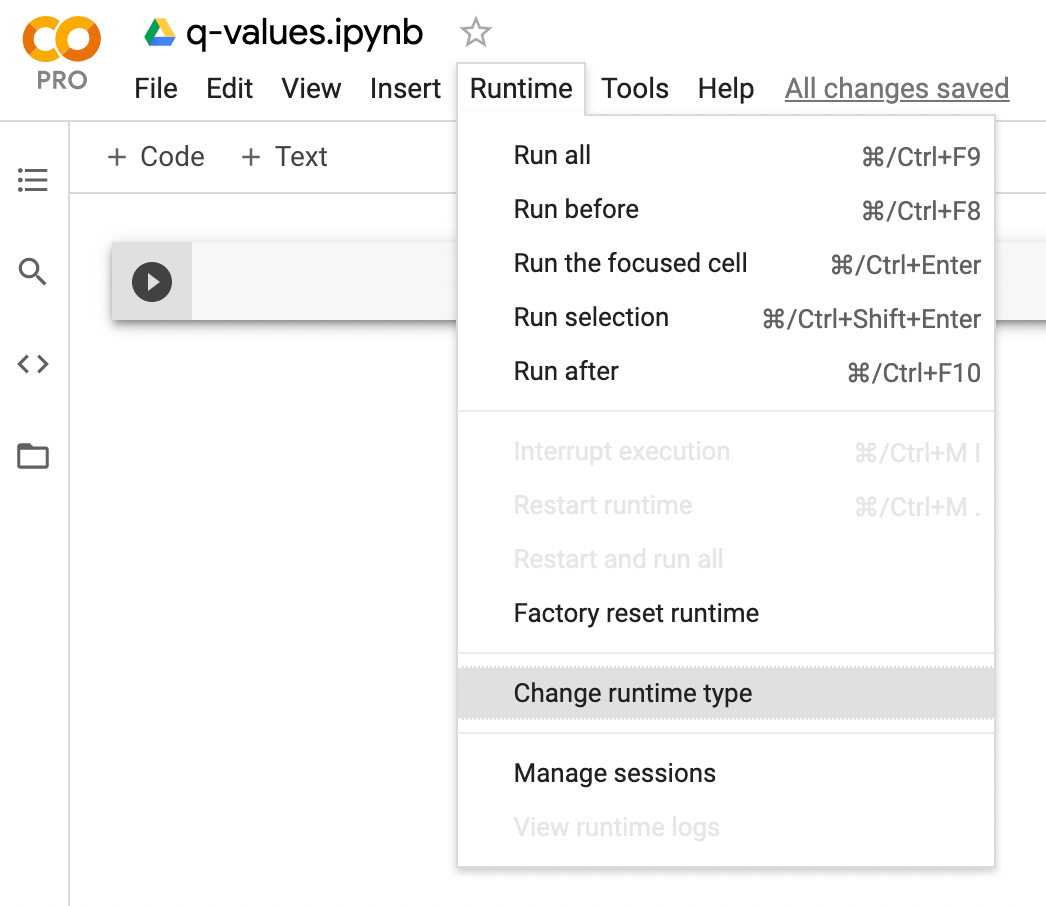

เลือกชนิดของ Hardware accelerator เป็น GPU และ Runtime shape เป็น High-RAM แล้วคลิ๊ก SAVE

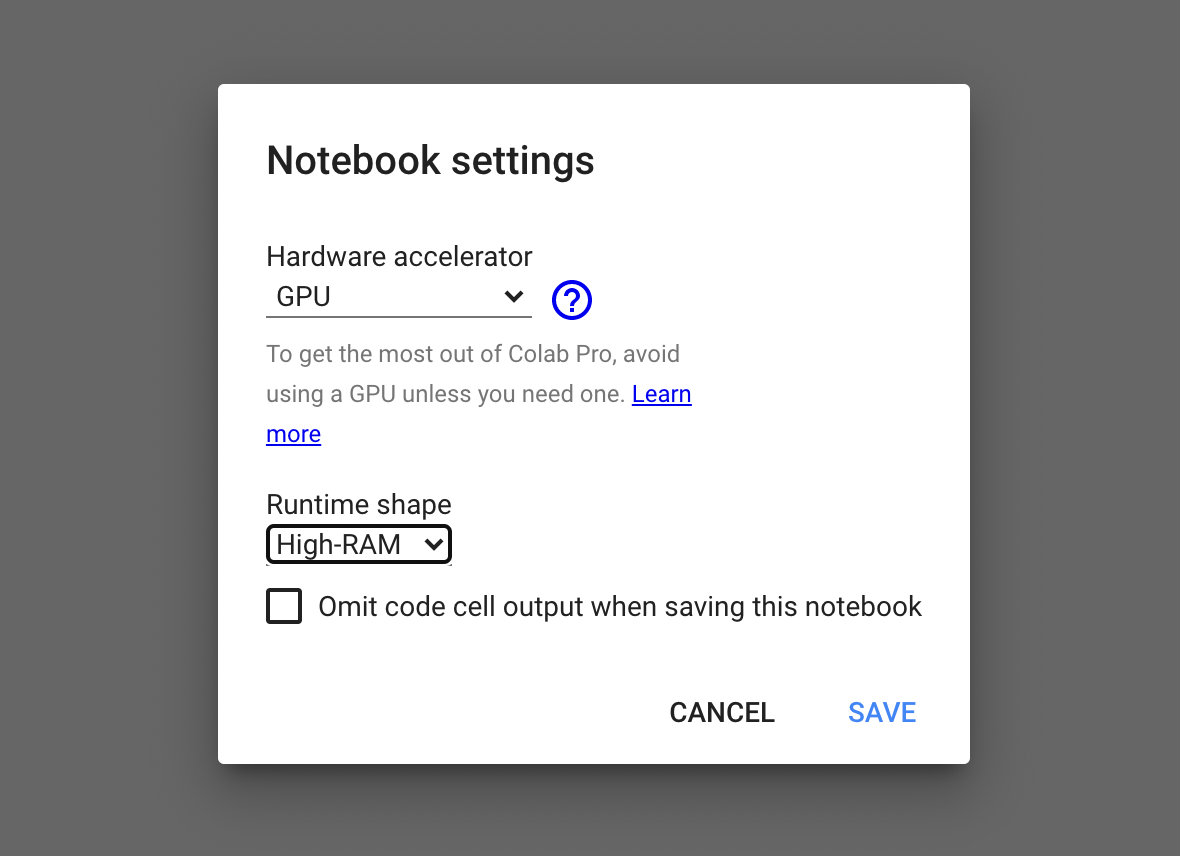

ตรวจสอบการใช้งาน GPU ด้วยคำสั่งต่อไปนี้

In [ ]:
!nvidia-smi

Sun Jun 11 04:00:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

แสดงจำนวน Core ของ CPU ที่ได้รับการจัดสรร

In [ ]:
from psutil import *

cpu_count()

2

แสดงข้อมูลของ CPU ในแต่ละ Core

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.152
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

Import Library ที่จำเป็นต้องใช้

In [ ]:
import gym
import numpy as np
import random

import plotly.graph_objs as go
import pickle as p

กำหนด Environment เป็น FrozenLake

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='human')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# !pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
# import pygame
# pygame.display.set_mode((640,480))

สุ่ม Action ด้วยคำสั่ง action = env.action_space.sample() นำ Action ที่สุ่มเข้า Environment เพื่อให้มันเปลี่ยนไปยัง State ถัดไป ด้วยคำสั่ง state, reward, done, info = env.step(action) และ Render State ที่เกิดขึ้น

In [ ]:
state = env.reset()
print('  (Start)')
env.render()

while True:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    print('\n')
    env.render()
    print(f'State = {state}, Reward = {reward}, Done = {done}')

    if done:
      break;

env.close()

  (Start)


State = 0, Reward = 0.0, Done = False


State = 0, Reward = 0.0, Done = False


State = 1, Reward = 0.0, Done = False


State = 0, Reward = 0.0, Done = False


State = 1, Reward = 0.0, Done = False


State = 1, Reward = 0.0, Done = False


State = 5, Reward = 0.0, Done = True


In [ ]:
import gym

env = gym.make('FrozenLake-v1', is_slippery=False)

state = env.reset()
print('(Start)')

while True:
    desc = env.unwrapped.desc.astype(str).tolist()
    desc[state // env.unwrapped.ncol][state % env.unwrapped.ncol] = 'S'
    grid = "\n".join(["".join(row) for row in desc])

    print(grid)
    print(f'State = {state}')

    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if done:
        break

env.close()


(Start)
SFFF
FHFH
FFFH
HFFG
State = 0
SFFF
SHFH
FFFH
HFFG
State = 4


In [ ]:
import gym
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False)
env.seed(0)
np.random.seed(0)

state = env.reset()
print('(Start)')

# Initialize value estimates for each state
values = np.zeros(env.observation_space.n)

step_count = 0

while True:
    # Render the environment grid
    desc = env.unwrapped.desc.astype(str).tolist()
    desc[state // env.unwrapped.ncol][state % env.unwrapped.ncol] = 'S'
    grid = "\n".join(["".join(row) for row in desc])

    # Print the grid, state, step count, and value estimates
    print(grid)
    print(f'State = {state}')
    print(f'Step count = {step_count}')
    print(f'Value estimates: {values}')

    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    # Update the value estimate for the current state
    values[state] += reward

    step_count += 1

    if done:
        break

env.close()


(Start)
SFFF
FHFH
FFFH
HFFG
State = 0
Step count = 0
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
SHFH
FFFH
HFFG
State = 4
Step count = 1
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
FHFH
FFFH
HFFG
State = 0
Step count = 2
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
FHFH
FFFH
HFFG
State = 0
Step count = 3
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
FHFH
FFFH
HFFG
State = 0
Step count = 4
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
SHFH
FFFH
HFFG
State = 4
Step count = 5
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
FHFH
SFFH
HFFG
State = 8
Step count = 6
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
SFFF
SHFH
FFFH
HFFG
State = 4
Step count = 7
Value estimates: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


###Q-Table

เพื่อจะคำนวนหา Q-values เราจะสร้าง Q-Table ขนาด 16 แถว 4 คอลัมน์ ตามจำนวน State และ Action ดัง Code ด้านล่าง

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

print(Q.shape)
print(Q)

(16, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


เราจะปรับค่า Q-value ด้วยการฝึกสอน AI Agent ทั้งหมด 1000 Episode แต่ละ Episode จะมีการเดินได้หลาย Step จนกระทั่ง FrozenLake Environment คืนค่าสถานะ Done เท่ากับ True ด้วยสมการ ดังต่อไปนี้

Q(s,a) = r + γ(max(Q(s',a'))

โดย

r คือ Reward

γ คือ Gamma

s' คือ Next State

a' คือ Next Action

และจะมีการทำงานตามขั้นตอน ดัง Code ด้านล่าง

กำหนด Parameter ต่างๆ

In [ ]:
learning_rate = 0.8
gamma = 0.95
num_episode = 1000

ฝึกสอนทั้งหมด 1000 Episode โดยจะค่อยๆ ลดการลองผิดลองถูก (Exploration) ด้วยคำสั่ง action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)*(1./(i+1)))

In [ ]:
reward_list = []

for i in range(num_episode):
    state = env.reset()
    sum_reward = 0

    while True:
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)*(1./(i+1)))

        next_state, reward, done, info = env.step(action)
        Q[state,action] = Q[state,action] + learning_rate*(reward + gamma*np.max(Q[next_state,:]))

        sum_reward += reward
        state = next_state

        if done == True:
            break

    reward_list.append(sum_reward)

Plot กราฟ Reward

In [ ]:
h1 = go.Scatter(y=reward_list,
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="reward"
                   )

data = [h1]
layout1 = go.Layout(title='Total Reward',
                   xaxis=dict(title='Episode'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show(renderer="colab")

แสดงค่าใน Q-Table

In [ ]:
print("Final Q-Table")
print(Q)

Final Q-Table
[[0.00000000e+00 0.00000000e+00 1.52230941e+14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33536084e+12 0.00000000e+00]
 [0.00000000e+00 9.75058325e+09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.68945445e+07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.51180800e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.39328000e+00 0.00000000e+00]
 [0.00000000e+00 2.48708480e+05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.24000000e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

โดย AI Agent จะเลือก Action จาก Q-Table จนกระทั่งสามารถเดินทางถึง Goal Block ได้ ดังตัวอย่างต่อไปนี้

In [ ]:
state = env.reset()
print('  (Start)')
env.render()

while True:
    action = np.argmax(Q[state,:])
    state, reward, done, info = env.step(action)
    print('\n')
    env.render()
    print(f'State = {state}, Reward = {reward}, Done = {done}')

    if done:
      break;

env.close()

  (Start)


/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning:

WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/





State = 1, Reward = 0.0, Done = False


State = 2, Reward = 0.0, Done = False


State = 6, Reward = 0.0, Done = False


State = 10, Reward = 0.0, Done = False


State = 14, Reward = 0.0, Done = False


State = 15, Reward = 1.0, Done = True


จากภาพด้านบนจะเห็นว่า AI Agent สามารถใช้ Q-Table ตัดสินใจเลือก Action ที่มีค่า Q-values หรือผลรวมของรางวัลที่น่าจะได้รับในอนาคตมากที่สุด

อย่างไรก็ตาม จำนวน State ของ Real-world Environment หรือแม้แต่เกมอย่าง Pong นั้นมีค่าใกล้อนันต์ การจะประมาณ Q-values ด้วย Q-Table ขนาดใหญ่ จึงเป็นไปได้ยากในทางปฏิบัติ ดังนั้นเราจะคำนวณค่า Q-values โดยใช้ Neural Network แทนการใช้ Q-Table ครับ

#Deep Q-Network

##Deep Learning Model

เราจะสร้าง Deep Learning Model แบบ Convolutional Neural Network จำนวน 2 ตัว (Double DQN) ที่มีการรับ Input เป็น Screen Pixel แบบ Grayscale ขนาดครึ่งหนึ่งของขนาดจาก Pong Environment จำนวน 4 Frame ที่อยู่ติดกัน (2 Frame สำหรับการประมาณความเร็ว, 3 Frame ขึ้นไปสำหรับประมาณความเร่ง) เพื่อประมาณค่า Q-value ซึ่ง Output Layer จะมีจำนวน Node เท่ากับขนาดของ Action Space ของ Pong Environment ดังตัวอย่าง ต่อไปนี้

Import Library ที่จำเป็น

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl

import cv2
import os
import pickle as pic
from collections import deque
import sys

loss_function = tf.keras.losses.Huber()
initializer = tf.keras.initializers.VarianceScaling(scale=2.0)

tf.__version__

'2.12.0'

กำหนดค่า Learning Rate, Loss Function และค่าเริ่มต้นของ Weight

In [ ]:
learning_rate=0.00025

loss_function = tf.keras.losses.Huber()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)

นิยาม Deep Learning Model

In [ ]:
def create_network(learning_rate, action_space):
    initializer = tf.keras.initializers.VarianceScaling(scale=2.0)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(105,80,4)))
    model.add(tf.keras.layers.Conv2D(32, 8, padding="same", strides=4, activation="relu", kernel_initializer=initializer, use_bias=False, name = "conv2d_1"))
    model.add(tf.keras.layers.Conv2D(64, 4, padding="same", strides=2, activation="relu", kernel_initializer=initializer, use_bias=False, name = "conv2d_2"))
    model.add(tf.keras.layers.Conv2D(64, 3, padding="same", strides=1, activation="relu", kernel_initializer=initializer, use_bias=False, name = "conv2d_3"))
    model.add(tf.keras.layers.Flatten(name = "flatten_1"))
    model.add(tf.keras.layers.Dense(512,activation="relu", kernel_initializer=initializer, name = "dense_1"))
    model.add(tf.keras.layers.Dense(action_space, kernel_initializer=initializer, name = "dense_2"))

    return model

ติดตั้ง Atari Environment สำหรับเกม Pong (ROM)

In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar
!mkdir ROM
!unrar e Roms.rar ROM


In [ ]:
!pip install absl-py atari-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-0.2.9-cp310-cp310-linux_x86_64.whl size=2856691 sha256=8c2cc5a10e29762cff80d27bd343a75d8865717be4435abd0d9bf777a548b889
  Stored in directory: /root/.cache/pip/wheels/75/6f/04/1f3bf5255580101e16ff487564354dddcdd23ec3b43b775b7a
Successfully built atari-py


In [ ]:
!pip install --upgrade git+https://github.com/openai/gym
!pip install autorom

#AutoRom

!pip install --upgrade gym[atari]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/gym to /tmp/pip-req-build-04rmftv5
  Running command git clone --filter=blob:none --quiet https://github.com/openai/gym /tmp/pip-req-build-04rmftv5
  Resolved https://github.com/openai/gym to commit dcd185843a62953e27c2d54dc8c2d647d604b635
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827635 sha256=8b4650e3280605bb93731c27b88c802dafbb2ff224299b0a9660a9e8bbfb73c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-qcguluv3/wheels/d1/2b/89/4a44b1366d1bc84847d0afaeb7a5cb5b8043d2d73660a49512
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m atari_py.import_roms ROM

copying solaris.bin from ROM/Solaris (The Last Starfighter, Star Raiders II, Universe) (1986) (Atari, Douglas Neubauer, Mimi Nyden) (CX26136) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/solaris.bin
copying time_pilot.bin from ROM/Time Pilot (1983) (Coleco - Woodside Design Associates, Harley H. Puthuff Jr.) (2663) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/time_pilot.bin
copying name_this_game.bin from ROM/Name This Game (Guardians of Treasure, Octopussy) (1983) (U.S. Games Corporation - JWDA, Roger Booth, Sylvia Day, Ron Dubren, Todd Marshall, Robin McDaniel, Wes Trager, Henry Will IV) (VC1007) ~.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/name_this_game.bin
copying atlantis.bin from ROM/Atlantis.bin to /usr/local/lib/python3.10/dist-packages/atari_py/atari_roms/atlantis.bin
copying seaquest.bin from ROM/Seaquest (1983) (Activision, Steve Cartwright) (AX-022) ~.bin to /usr/local/lib/python3.10/dist-packages/atar

Compile Model แสดง Output Shape และจำนวน Parameter

In [ ]:
import gym
import numpy as np
import random

import plotly.graph_objs as go
import pickle as p

In [ ]:
env = gym.make('Pong-v4')

model = create_network(learning_rate, env.action_space.n)
model.compile(loss=loss_function, optimizer=optimizer)

target_model = create_network(learning_rate, env.action_space.n)
target_model.compile(loss=loss_function, optimizer=optimizer)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 27, 20, 32)        8192      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 10, 64)        32768     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 10, 64)        36864     
                                                                 
 flatten_1 (Flatten)         (None, 8960)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               4588032   
                                                                 
 dense_2 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 4,668,934
Trainable params: 4,668,934
No

In [ ]:
target_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 27, 20, 32)        8192      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 10, 64)        32768     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 10, 64)        36864     
                                                                 
 flatten_1 (Flatten)         (None, 8960)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               4588032   
                                                                 
 dense_2 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 4,668,934
Trainable params: 4,668,934
No

จะเห็นว่า Model ของเรามีจำนวน Parameter ประมาณ 4.7 ล้านตัว ซึ่งถือว่าเป็น Model ที่มีขนาดไม่ใหญ่มากนัก

###Screen Pixel Preprocessing

แต่ด้วย Screen Pixel เดิม จาก Pong Environment นั้นเป็นภาพสี ขนาด 210X160 โดยแต่ละ Pixel จะมีค่าอยู่ระหว่าง 0 - 236 ดังตัวอย่าง ต่อไปนี้

In [ ]:
env = gym.make('Pong-v4')
env.reset()

action = env.action_space.sample()
asd=env.step(action)

state, reward,done1,done2, info = env.step(action)

print(state.shape)
print(state.min(), state.max())

(210, 160, 3)
0 236


In [ ]:
print(state)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]


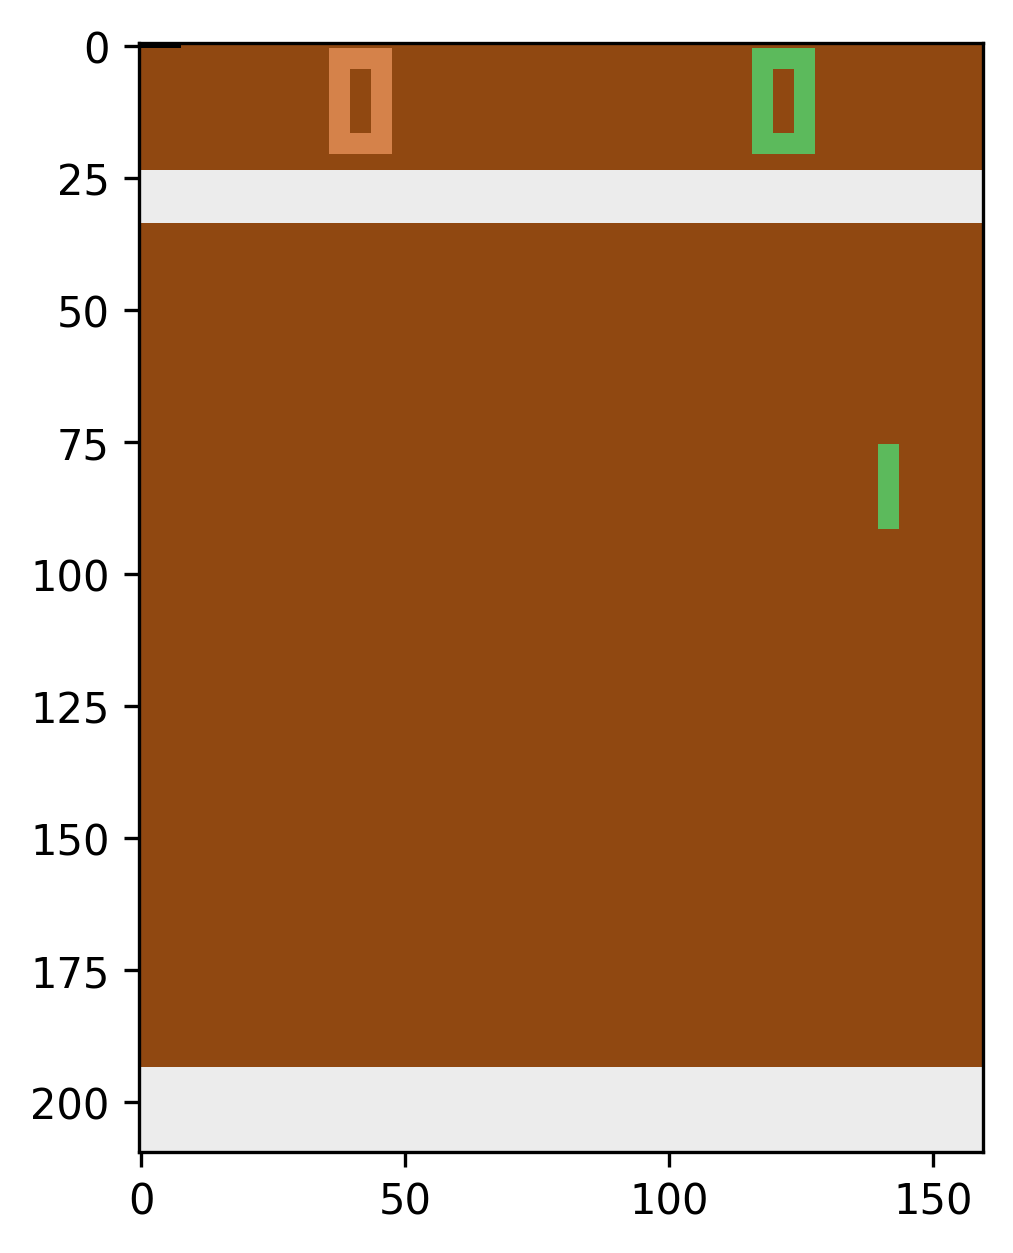

In [ ]:
mpl.rcParams['figure.dpi'] = 300

plt.imshow(state)
plt.savefig('pong.png')

ดังนั้นจึงต้องมีการทำ Preprocessing เพื่อแปลงภาพเป็นแบบ Grayscale ขนาด 105X80 และ Nomalization ให้ค่าสีอยู่ระหว่าง 0.00 - 1.00 เสียก่อน

In [ ]:
def screen_pixel_preprocess(observation):
    s = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
    s = cv2.resize(s, (0, 0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    s = s/236.0
    return s

In [ ]:
state = screen_pixel_preprocess(state)
state.shape

(105, 80)

In [ ]:
print(state)

[[0.13559322 0.13559322 0.13559322 ... 0.27118644 0.27118644 0.27118644]
 [0.27118644 0.27118644 0.27118644 ... 0.27118644 0.27118644 0.27118644]
 [0.27118644 0.27118644 0.27118644 ... 0.27118644 0.27118644 0.27118644]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


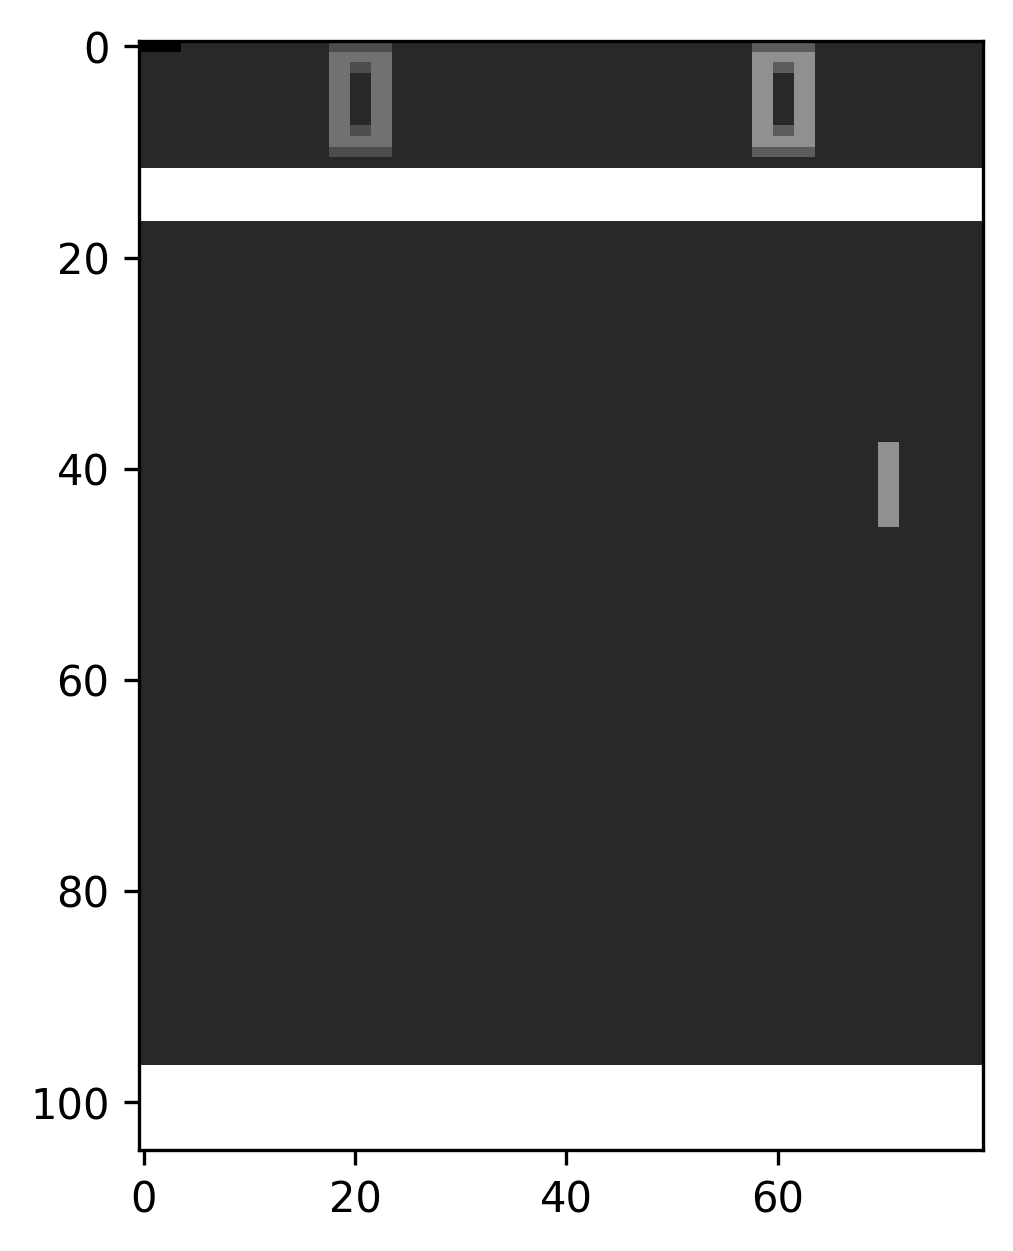

In [ ]:
plt.imshow(state, cmap='gray')
plt.savefig('pong2.png')

###Save Model to Google Drive

เราจะฝึกสอน AI Agent ทั้งหมด 2,000 Episode ซึ่งแต่ละ Episode หรือแต่ละเกม ผู้เล่นทั้ง 2 ฝั่ง จะต้องพยายามทำคะแนนให้ได้ 21 คะแนนก่อน โดยทุกๆ 100 Episode จะมีการ Save Model ลง Google Drive 1 ไฟล์ (model-xxx.h5) ตามขั้นตอนดังนี้

Mount Colab กับ Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


คลิ๊ก Link เพื่อขอ Authorization Code สำหรับเข้าถึง Google Drive

เลือก Google Account แล้วคลิ๊ก อนุญาต

Copy Authorization Code เพื่อไปวางใน Text Box แล้วกด Enter

ไปที่ Google Drive ด้วย Google Account ที่เลือกด้านบน แล้วสร้าง Folder ชื่อ colabpro_drive

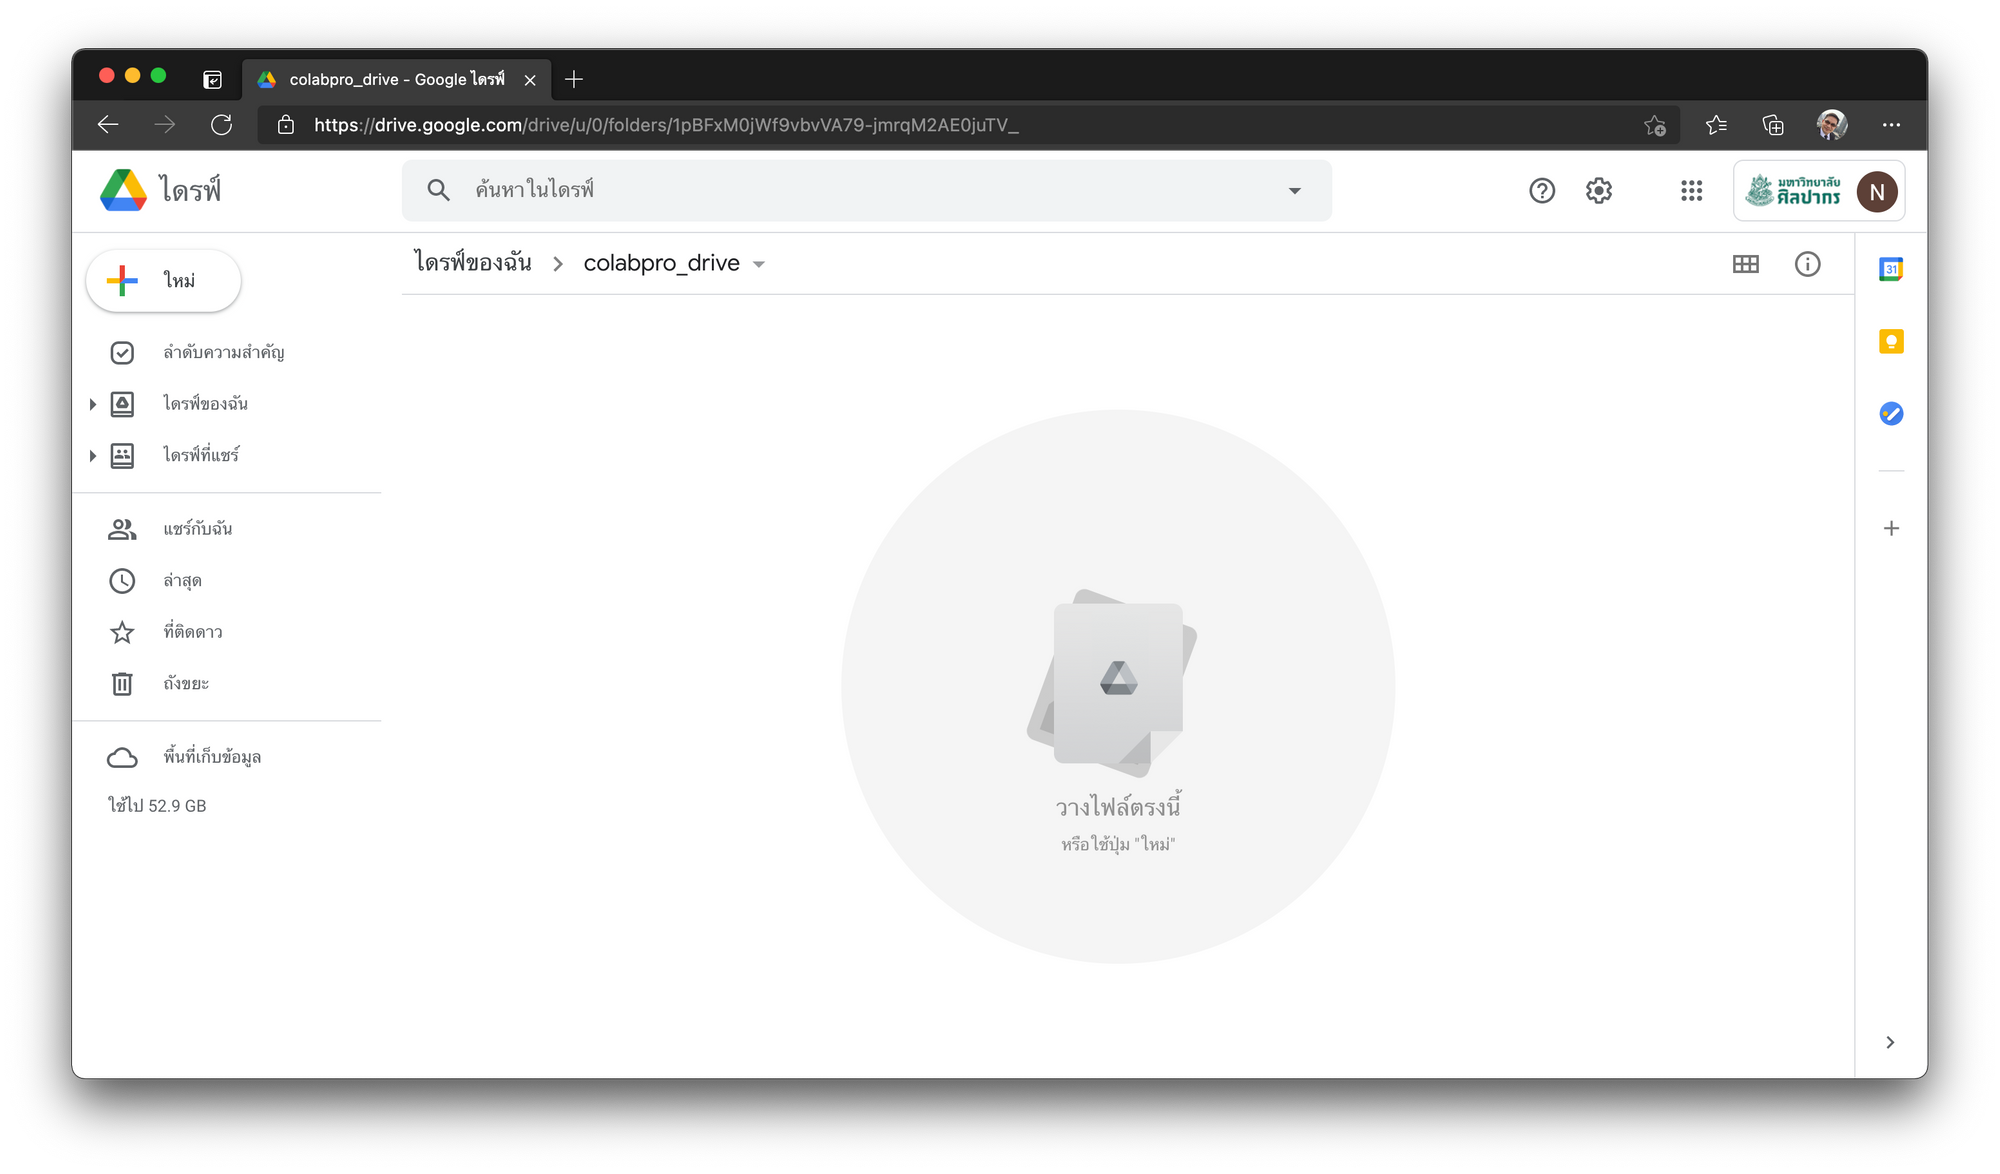

ติดตั้ง Google Drive App (Option)

เปลี่ยน Directory (Folder) ปัจจุบันเป็น colabpro_drive

In [ ]:
os.chdir("drive/My Drive/colabpro_drive")

ตรวจสอบ Directory ปัจจุบัน

In [ ]:
pwd

'/content/drive/My Drive/colabpro_drive'

###Render OpenAI Gym on Google Colab
เพื่อจะดูการเล่นเกม Pong ของ AI Agent กับ Bot เราจะใช้วิธีสร้าง Video ดังต่อไปนี้

ติดตั้ง Package xvfb

In [ ]:
!apt update
!apt install xvfb

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,776 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,255 kB]
Get:14 http://archiv

ติดตั้ง Library pyvirtualdisplay เพียงครั้งเดียว โดยการเก็บไฟล์ใน Google Drive (colabpro_drive/lib)

In [ ]:
nb_path = "/content/drive/My Drive/colabpro_drive/lib"

sys.path.append(nb_path)

In [ ]:
!pip install pyvirtualdisplay --target="{nb_path}" --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


หลังจากติดตั้ง Library ในครั้งแรกแล้วให้เปิด Comment ดังตัวอย่าง Code ด้านล่าง โดยไม่ต้องรันใหม่อีกต่อไป

In [ ]:
# !pip install pyvirtualdisplay --target="{nb_path}" --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)


Import Library สำหรับการบันทึก Video

In [ ]:
import pyvirtualdisplay
import gym
# from gym.wrappers import Monitor
from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython import display as ipythondisplay
from IPython.display import HTML

Start Virtual Display สำหรับการบันทึก Video

In [ ]:
d = pyvirtualdisplay.Display()
d.start()

นิยาม Function สำหรับ Replay Video

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
      <source src="data:video/mp4;base64,{0}" type="video/mp4" />
      </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  # env = Monitor(env, './video', force=True)
  env = RecordVideo(env, './video')
  return env

เล่นเกม Pong กับ Bot โดยการสุ่ม Action ซึ่งเมื่อจบเกมเราจะได้ไฟล์ MP4 เอาไว้ Replay ทีหลัง

In [ ]:
env = wrap_env(gym.make('Pong-v4', render_mode="rgb_array"))
state = env.reset()

while True:
    env.render()
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if done:
        break;

env.close()
show_video()

AttributeError: ignored

Exploration Strategy

อย่างไรก็ตาม ในช่วงแรกของการฝึกสอน เราจะต้องสุ่ม Action ในอัตราที่มากพอโดยให้มันเลือกว่าจะค้นหาแนวทางใหม่ (Explore) เพื่อไม่ก่อให้เกิดปัญหา Local Minima หรือจะทำในแบบที่คิดว่าดีอยู่แล้ว (Exploit)

โดยการกำหนด epsilon ซึ่งเป็นค่าที่จะบอกให้มีการสุ่ม Action มากหรือน้อย ที่ถ้า epsilon เท่ากับ 1.0 จะมีโอกาสสุ่ม Action 100%

ในการฝึกสอนเราจะลดค่า epsilon จาก 1.0 จนถึง 0.1 เมื่อผ่านไปแล้ว 1 ล้าน Frame นอกจากนี้เราจะบังคับให้มีโอกาสในการสุ่ม 100% ตั้งแต่เริ่มต้นฝึกสอน จนถึง Frame Count เท่ากับ 50,000

In [ ]:
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
epsilon_interval = (
    epsilon_max - epsilon_min
)

epsilon_greedy_frames = 1000000.0
epsilon_random_frames = 50000

eps_memory = []

In [ ]:
for frame_count in range(2000000):
  if frame_count < epsilon_random_frames:
    eps_memory.append(1)
  else:
    eps_memory.append(epsilon)

  epsilon -= epsilon_interval/epsilon_greedy_frames
  epsilon = max(epsilon, epsilon_min)

In [ ]:
h1 = go.Scatter(y=eps_memory,
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="epsilon"
                   )

data = [h1]
layout1 = go.Layout(title='Epsilon Schedule',
                   xaxis=dict(title='Frame Count'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show(renderer="colab")

###Collect Dataset

ขณะที่มีการฝึกสอน จะมีการบันทึก Screen Pixel, Reward และ Action ลง Buffer เพื่อจะได้สุ่มเลือกมา Train Model ตามขนาด Batch Size ในภายหลัง แต่ด้วยข้อจำกัดของ Memory ที่ได้รับการจัดสรรตามโควต้าของ Colab Pro ทำให้ผู้เขียนสามารถกำหนดขนาด Buffer ได้สูงสุดเพียง 40,000 เพื่อไม่ให้เกิด Session Crash เมื่อ Memory เต็ม

โดยเราจะรวบรวม 4 Screen Pixel ที่อยู่ติดกันลงในตัวแปร pre_state และ state เมื่อผ่านไป x Step ดังตัวอย่างต่อไปนี้

In [ ]:
frame_id = 0
state = []
pre_state = []

def sample():
  return np.random.choice(6)

def step(action):
  global frame_id
  frame_id+=1
  return frame_id

def update_state(state, observation):
    state.append(observation)

    if len(state) > 4:
        del state[:1]

def predict(state):
  return 1

In [ ]:
update_state(state, None)

for num_step in range(5):
  if len(state) < 4:
      action = sample()
  else:
      action = predict(state)

  pre_state.append(state[-1])
  if len(pre_state) > 4:
      del pre_state[:1]

  observation = step(action)

  update_state(state,observation)


In [ ]:
pre_state, state

*Frame ID ที่เก็บอยู่ใน pre_state และ state

จาก Frame ID ใน pre_state และ state ในการฝึกสอนจริง เราจะนำ Screen Pixel ตามลำดับดังตัวอย่าง ที่มี Shape เป็น 105x80x4 ไปบันทึกลงใน Buffer (state_memory และ state_next_memory)

###Double DQN

ในอีก 2 ปีหลังจากการตีพิมพ์ Paper ชื่อ Playing Atari with Deep Reinforcement Learning DeepMind ก็ได้ตีพิมพ์ Paper ที่แสดงให้เห็นว่าการฝึกสอน AI Agent ที่ใช้ DQN 2 ตัว (Double DQN) สามารถเพิ่มประสิทธิภาพในการเล่นเกมได้อีก ดังนั้นในการทดลอง ผู้เขียนจึงใช้เทคนิคดังกล่าวในการฝึกสอนด้วย

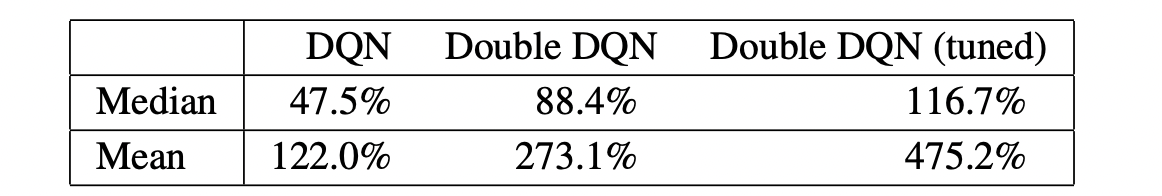

ภาพต่อไปนี้แสดง AI Agent Architecture สำหรับการฝึกสอน Model แบบ Double DQN (1. model และ 2. taget_model) โดย model จะเป็น DQN ตัวหลักที่มีปฏิสัมพันธ์กับ Gym Environment ด้วย Exploration Strategy ดังที่ได้อธิบายไปแล้วข้างต้น ซึ่งขณะที่เล่นเกม เราจะบันทึกข้อมูล reward, action, state และ state_next ลง Buffer (reward_memory, action_memory, state_memory และ state_next_memory ) เพื่อใช้ในการ Train Model ต่อไป

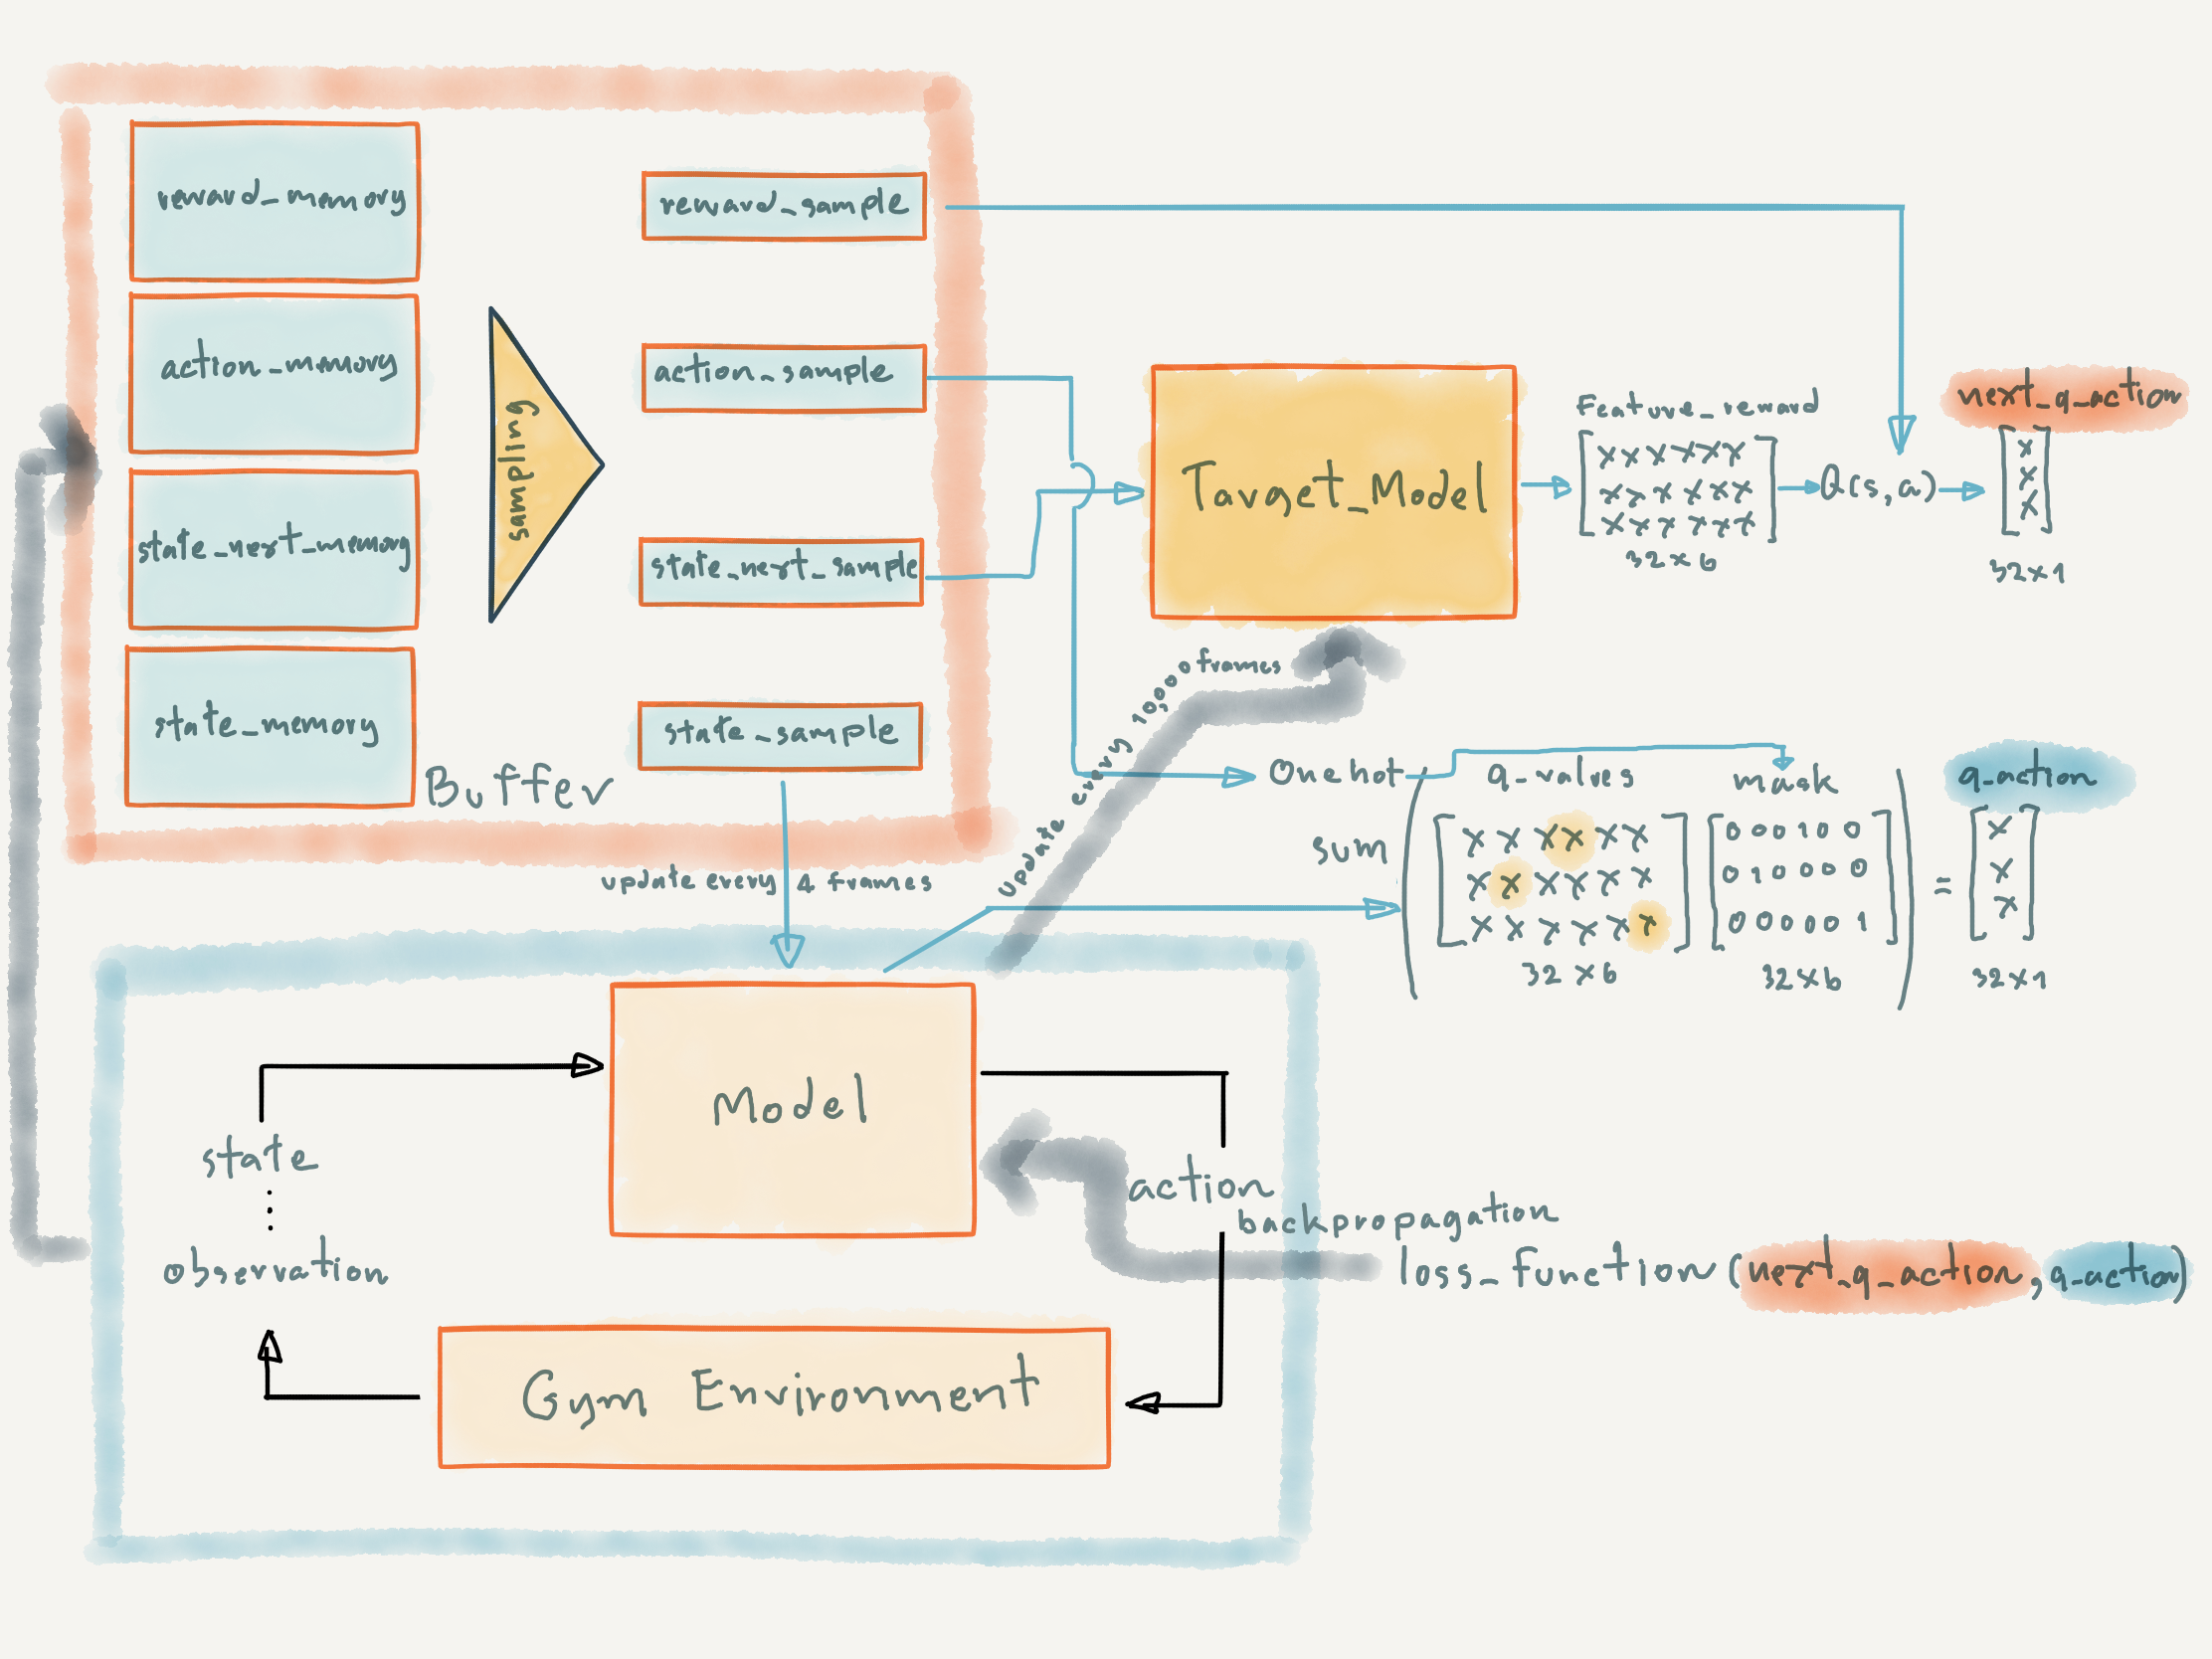

ในการ Train Model เราจะมีการ Update Weight ที่ DQN ตัวหลัก (model) ทุกๆ 4 Frame โดยใช้ผลเฉลย (next_q_action) ที่ได้จากการ Predict ด้วย target_model ขณะที่ target_model จะถูก Update Weight ทุกๆ 10,000 Frame

ซึ่งการชลอการ Update ของ target_model จะทำให้สามารถเพิ่มประสิทธิภาพในการเล่นเกมของ  AI Agent ได้ (https://arxiv.org/pdf/1509.06461.pdf)

การ Train Model จะมีขั้นตอนดังนี้

นิยาม update_state Function สำหรับรวบรวม 4 Screen Pixel

In [ ]:
def update_state(state, observation):
    observation = screen_pixel_preprocess(observation)
    state.append(observation)

    if len(state) > 4:
        del state[:1]

นิยาม save_history Function สำหรับบันทึก Reward ในแต่ละเกม

In [ ]:
def save_history(filename, history):
    with open(filename, 'wb') as file:
      pic.dump(history, file)

นิยามตัวแปร และกำหนด Parameter ที่ต้องใช้

In [ ]:
action_memory = []
state_memory = []
state_next_memory = []
rewards_memory = []
done_memory = []
history= []

num_episode = 2000
frame_count = 0

epsilon_random_frames = 50000
epsilon_greedy_frames = 1000000.0
max_memory_length = 40000
update_after_actions = 4
update_target_network = 10000

num_action = env.action_space.n
batch_size = 32

gamma = 0.99  # Discount factor for past rewards
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
epsilon_interval = (
    epsilon_max - epsilon_min
)

Train Model

In [ ]:
for i in range(num_episode):
    observation = env.reset()
    done = False
    state = []
    pre_state = []
    update_state(state,observation)

    episode_reward = 0

    while not done:
        frame_count += 1
        if frame_count < epsilon_random_frames or epsilon > random.random() or len(state) < 4:
            action = np.random.choice(num_action)
        else:
            s = np.stack((state[0],state[1],state[2],state[3]),axis=2)
            s = np.array([s])

            action_probs = model.predict(s)
            action = tf.argmax(action_probs[0]).numpy()

        epsilon -= epsilon_interval/epsilon_greedy_frames
        epsilon = max(epsilon, epsilon_min)

        pre_state.append(state[-1])
        if len(pre_state) > 4:
            del pre_state[:1]

        observation, reward, done, _ = env.step(action)

        update_state(state, observation)


        episode_reward += reward

        if len(state) == 4 and len(pre_state) == 4:
            action_memory.append(action)

            pre_state_for_model = np.stack((pre_state[0],pre_state[1],pre_state[2],pre_state[3]),axis=2)
            state_memory.append(pre_state_for_model)

            state_for_model = np.stack((state[0],state[1],state[2],state[3]),axis=2)
            state_next_memory.append(state_for_model)

            rewards_memory.append(reward)

        if frame_count % update_after_actions == 0 and len(rewards_memory) > batch_size:
            random_index = np.random.choice(range(len(rewards_memory)), size=batch_size)

            action_sample = [action_memory[i] for i in random_index]
            state_sample = np.array([state_memory[i] for i in random_index])
            state_next_sample = np.array([state_next_memory[i] for i in random_index])
            rewards_sample = [rewards_memory[i] for i in random_index]

            future_rewards = target_model.predict(state_next_sample)
            next_q_values = rewards_sample + gamma * tf.reduce_max(
                future_rewards, axis=1
            )

            masks = tf.one_hot(action_sample, num_action)

            with tf.GradientTape() as tape:
                q_values = model(state_sample)
                q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)

                loss = loss_function(next_q_values, q_action)
                grads = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if frame_count % update_target_network == 0:
            target_model.set_weights(model.get_weights())

        if len(rewards_memory) > max_memory_length:
            del action_memory[:1]
            del state_memory[:1]
            del state_next_memory[:1]
            del rewards_memory[:1]

    history.append(episode_reward)
    print(str(i)+ " episode total reward:",episode_reward)
    print("Frame Count = " + str(frame_count))

    if i%100 == 0:
        print("Saving the model")
        model.save("model/model-{}.h5".format(i))

        print("Saving the history")
        save_history("reward_history", history)

คลิ๊กที่ Terminal แล้วตรวจสอบการใช้ Momery ด้วยคำสั่ง top

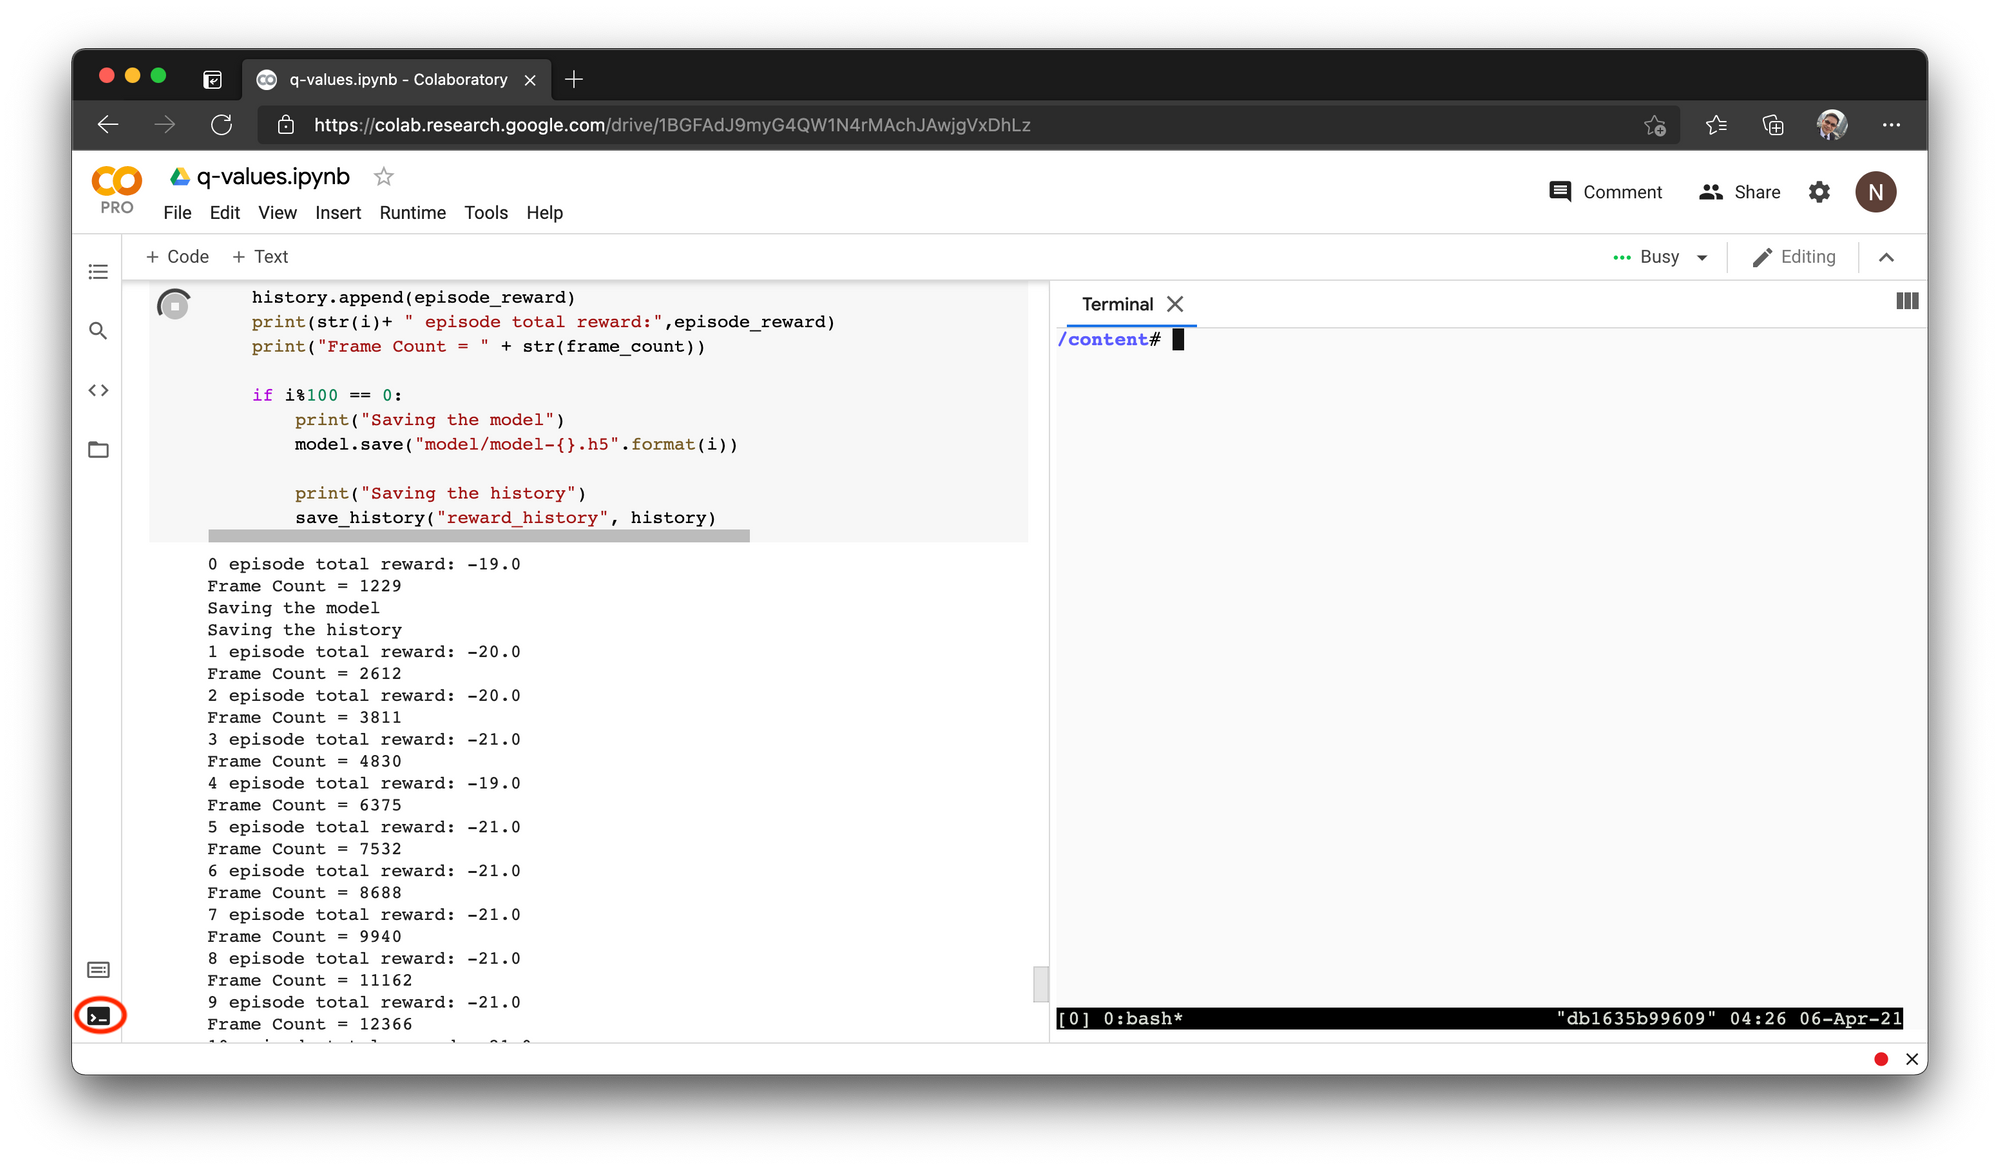

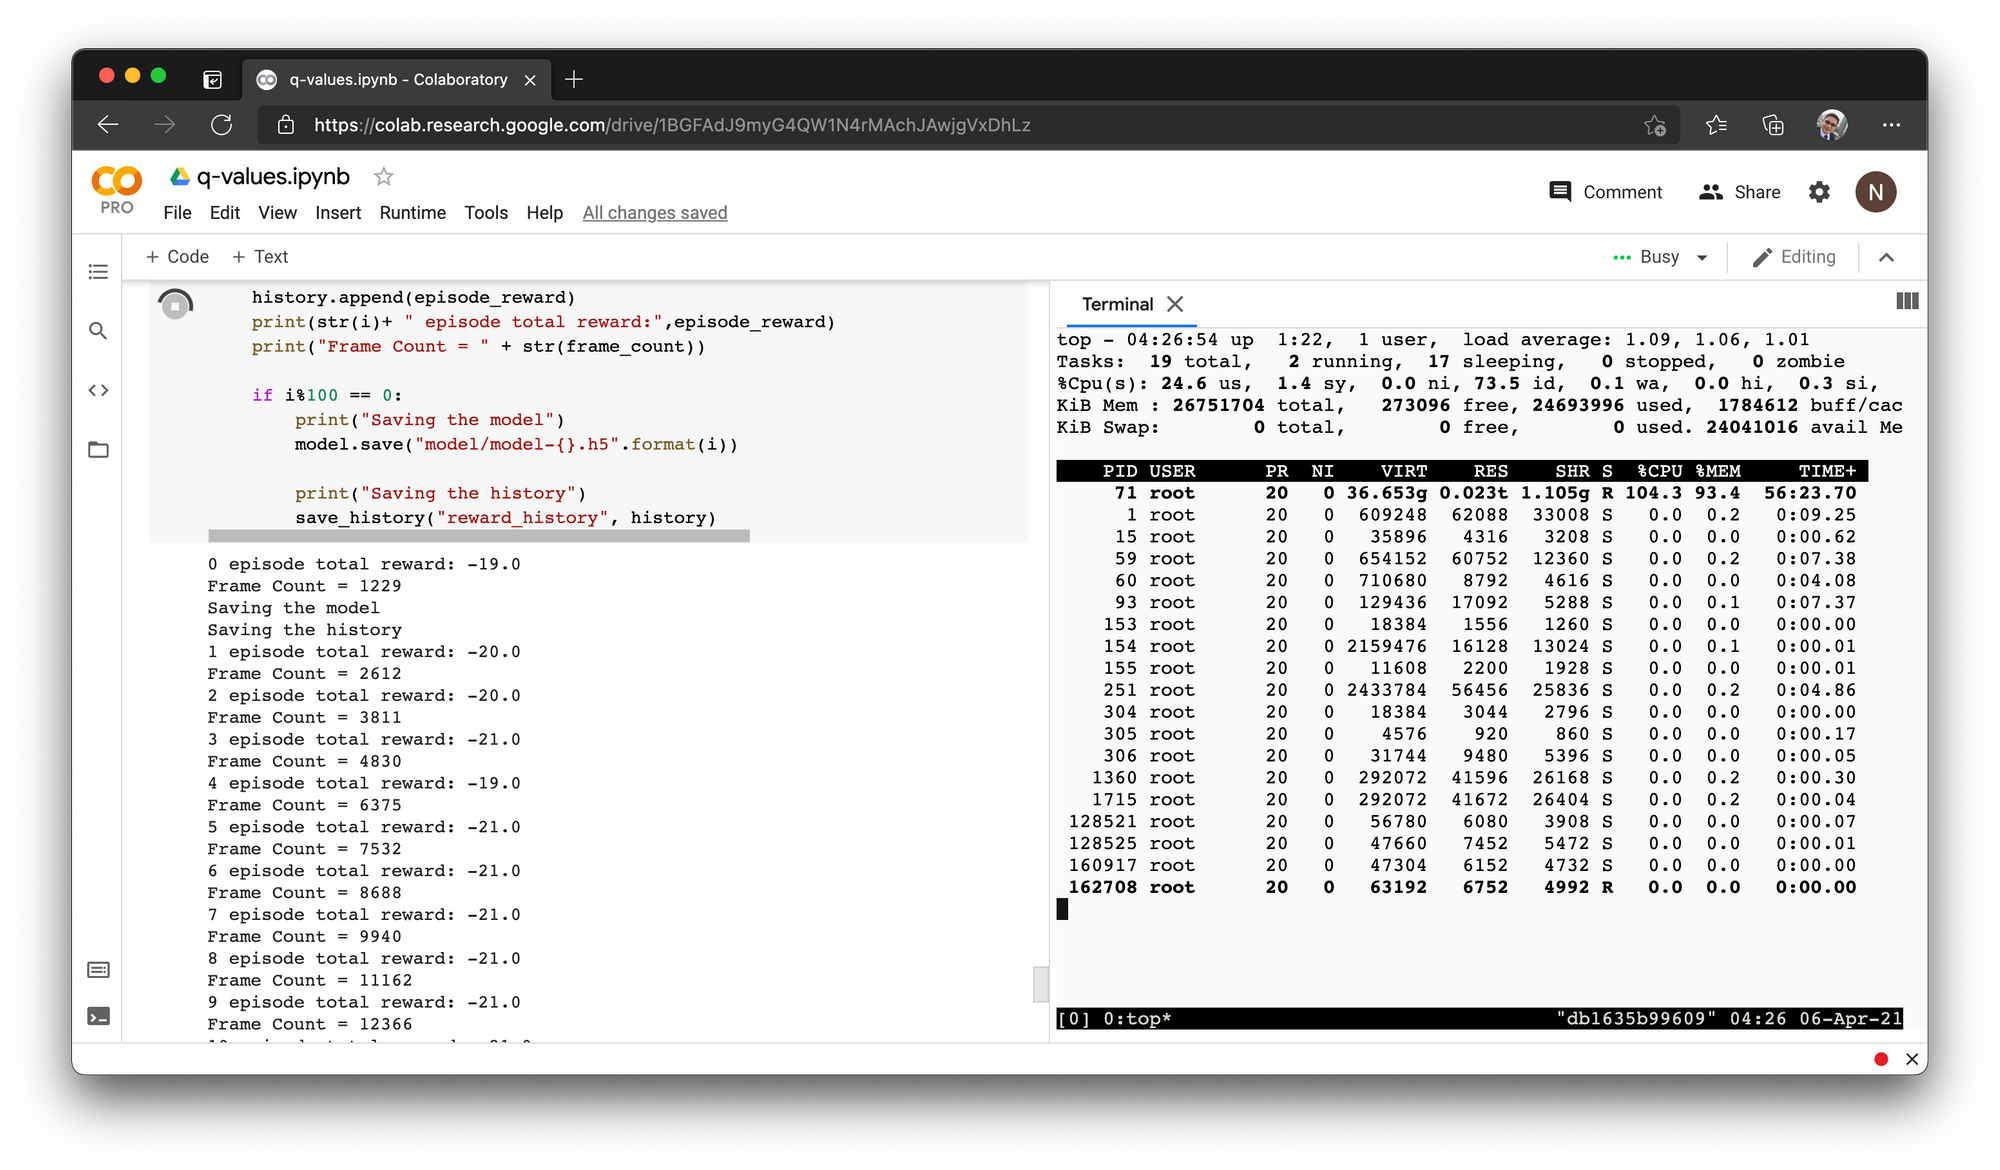

ซึ่งจะพบว่ามีการใช้ Memory ทั้งหมด 93.4%

กด q เพื่อออกจาก top (ถ้าต้องการ)
ไปที่ JavaScript Console ของ Browser ที่ผู้อ่านใช้งาน เช่น Tools -> Developer -> JavaScript Console (ของ MS Edge) เพื่อรัน Script รักษา Session ไม่ให้ Timeout

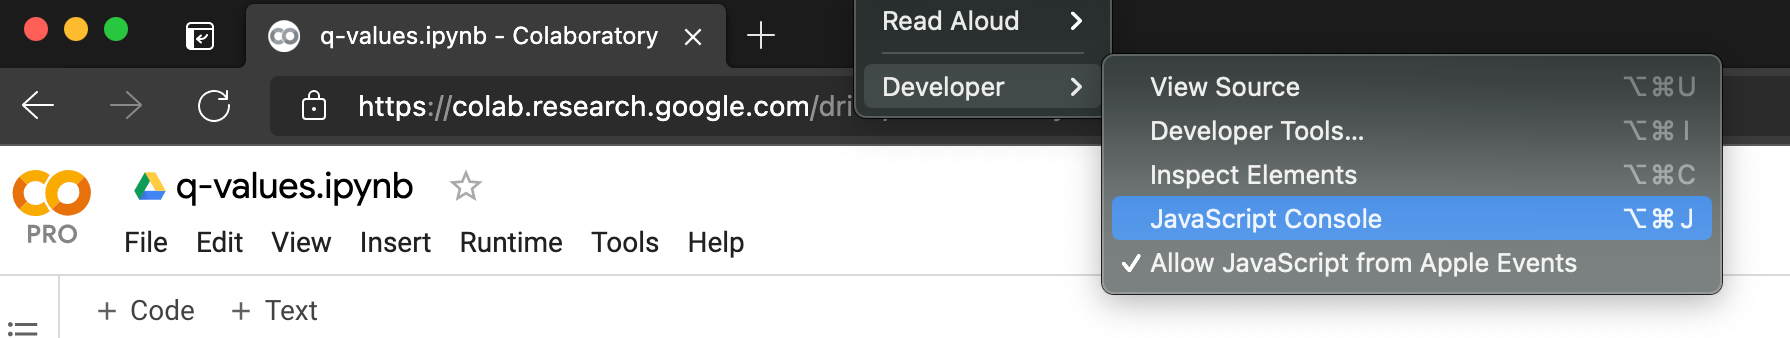

Copy Code การรักษา Session ไปวางที่ JavaScript Console แล้วกด Enter เพื่อรัน Script

In [ ]:
function ConnectButton(){
    console.log("Connect pushed");
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ConnectButton,80000);

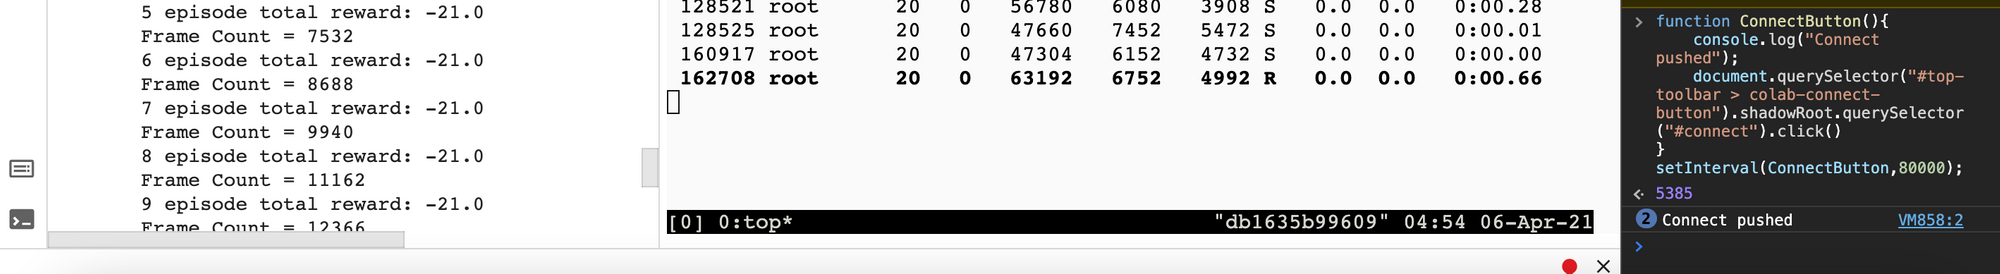

ผู้เขียน Train AI Agent บน Google Colab Pro ทั้งหมด 700 เกม (Episode) เป็นเวลากว่า 16 ชั่วโมง จนกระทั่งหมดโควต้าการใช้งาน GPU ซึ่งมีการเรียนรู้จาก Screen Pixel ไปทั้งสิ้นกว่า 1.5 ล้าน Frame โดยมีการบันทึก Model ทุกๆ 100 Episode



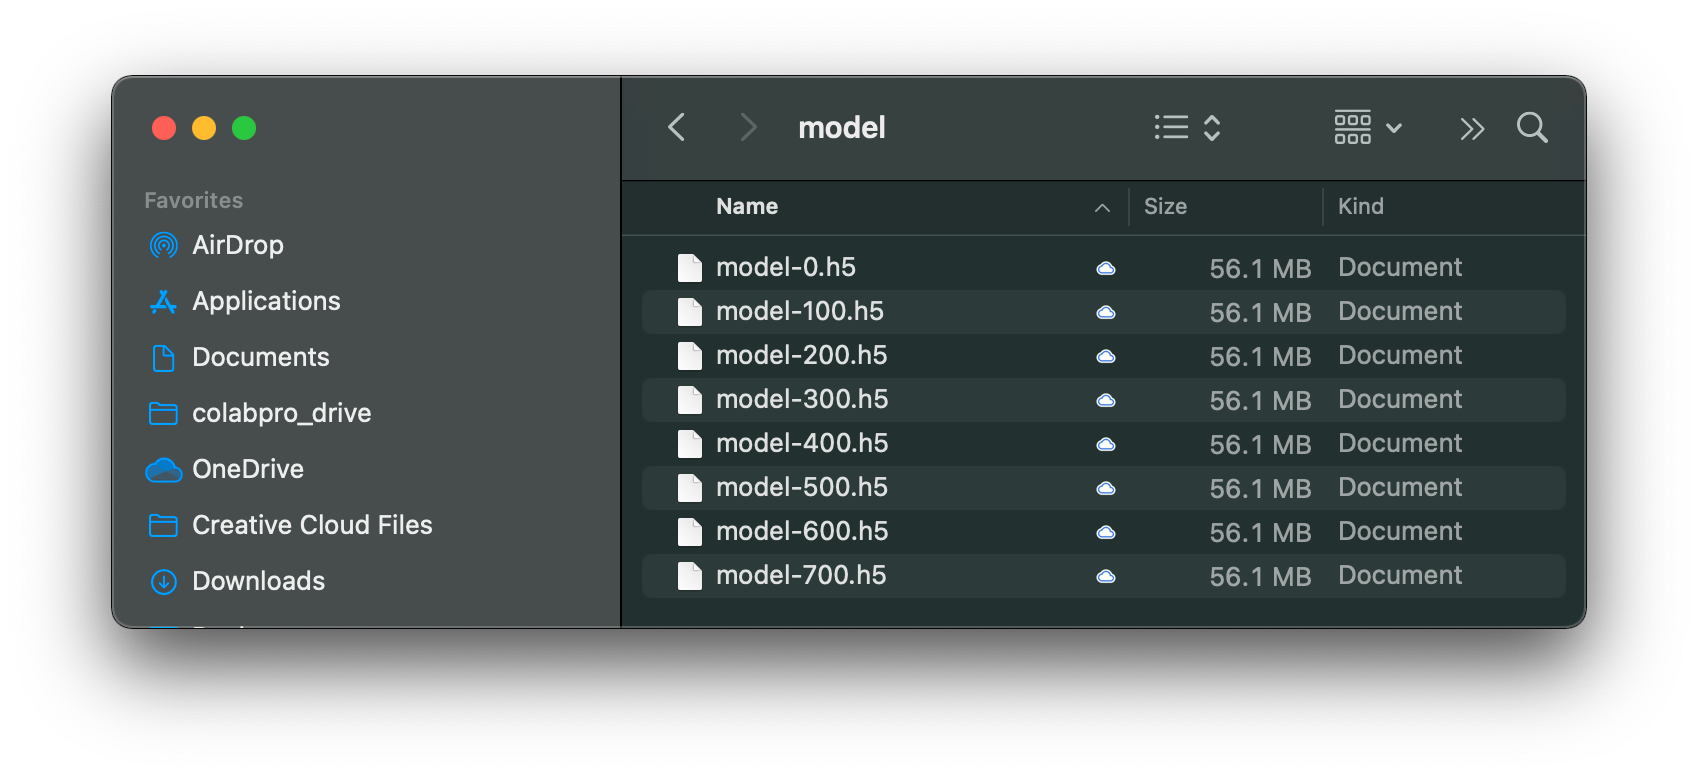

###Play the Game

เราจะเล่นเกมจาก Notebook ไฟล์ใหม่ ดังนี้

คลิ๊กที่ File -> New notebook

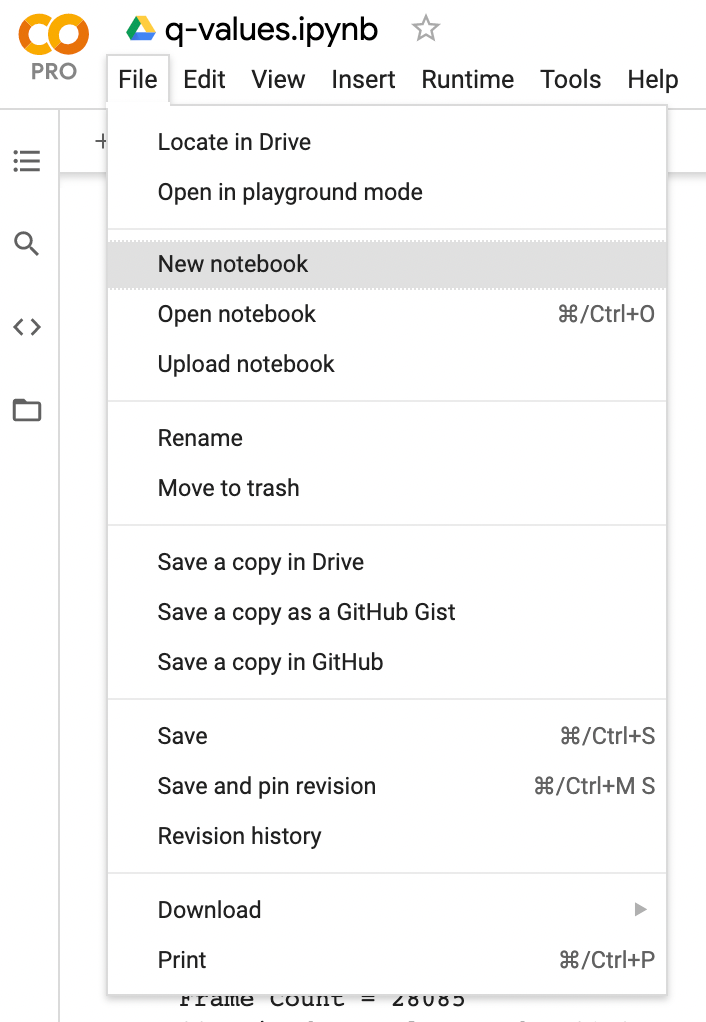

คลิ๊กที่ Untitled0.ipynb ตั้งชื่อไฟล์เป็น play.ipynb แล้วเลือกเมนู Runtime -> Change runtime type

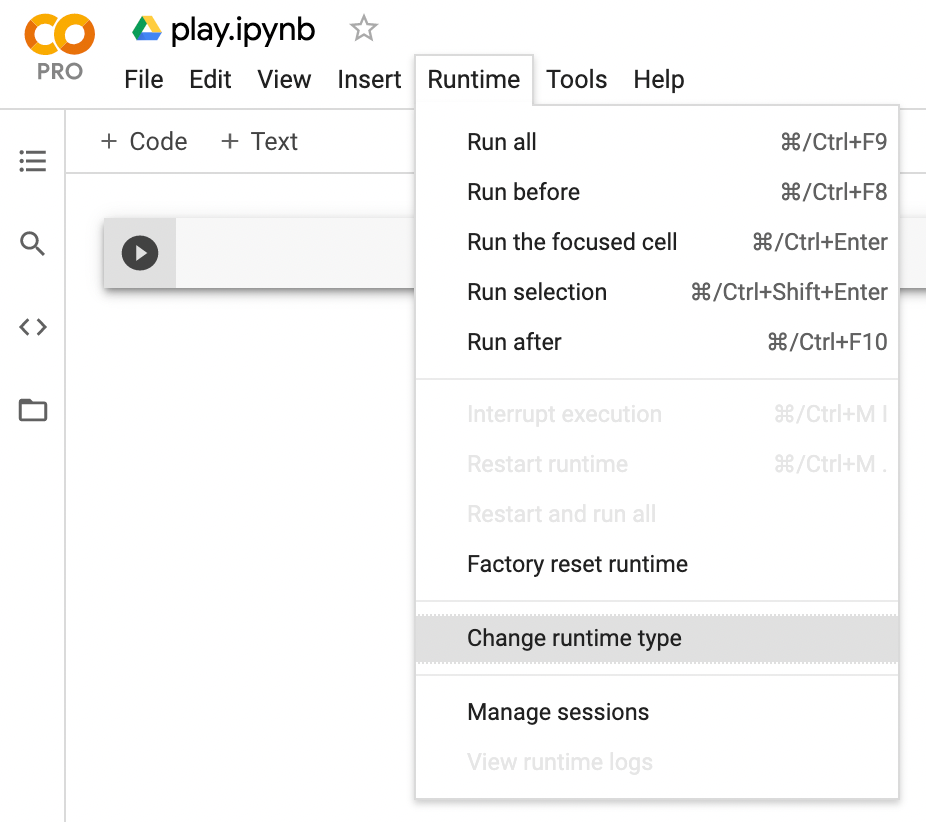

เลือกชนิดของ Hardware accelerator เป็น GPU และ Runtime shape เป็น High-RAM แล้วคลิ๊ก SAVE

ตรวจสอบการใช้งาน GPU ด้วยคำสั่งต่อไปนี้

In [ ]:
!nvidia-smi

แสดงจำนวน Core ของ CPU ที่ได้รับการจัดสรร

In [ ]:
from psutil import *

cpu_count()

แสดงข้อมูลของ CPU ในแต่ละ Core

In [ ]:
!cat /proc/cpuinfo

Mount Colab กับ Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

เปลี่ยน Directory (Folder) ปัจจุบันเป็น colabpro_drive

In [ ]:
os.chdir("drive/My Drive/colabpro_drive")

ตรวจสอบ Directory ปัจจุบัน

In [ ]:
pwd

ติดตั้ง Package xvfb

In [ ]:
!apt update
!apt install xvfb

Import Library สำหรับการบันทึก Video

In [ ]:
import sys
nb_path = "/content/drive/My Drive/colabpro_drive/lib"

sys.path.append(nb_path)

# !pip install pyvirtualdisplay --target="{nb_path}" --upgrade

import pyvirtualdisplay
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython import display as ipythondisplay
from IPython.display import HTML

Start Virtual Display สำหรับการบันทึก Video

In [ ]:
d = pyvirtualdisplay.Display()
d.start()

นิยาม Function สำหรับ Replay Video

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
      <source src="data:video/mp4;base64,{0}" type="video/mp4" />
      </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

Import Library อื่นๆ ที่จำเป็น

In [ ]:
import gym
import cv2
import numpy as np

import plotly.graph_objs as go
import pickle as p

from sklearn.manifold import TSNE

import pandas as pd
import plotly.express as px

import tensorflow as tf
load_model = tf.keras.models.load_model

Load Reward History

In [ ]:
with open('reward_history', 'rb') as file:
    history = p.load(file)

Plot กราฟ Reward

In [ ]:
h1 = go.Scatter(y=history,
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="reward"
                   )

data = [h1]
layout1 = go.Layout(title='Total Reward',
                   xaxis=dict(title='Episode'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show(renderer="colab")

นิยาม screen_pixel_preprocess, update_state และ predict_action Function

In [ ]:
def screen_pixel_preprocess(observation):
    s = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
    s = cv2.resize(s, (0, 0), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    # cv2.imwrite('image.png',s)
    s = s/236.0
    return s

def update_state(state,observation):
    ds_observation = screen_pixel_preprocess(observation)
    state.append(ds_observation)
    if len(state) > 4:
        del state[:1]

def predict_action(model, s):
    return np.argmax(model.predict(np.array([np.stack((s[0],s[1],s[2],s[3]),axis=2)]))[0])

Load Model

In [ ]:
model = load_model('model/model-700.h5')

model.summary()

ติดตั้ง Atari Environment สำหรับเกม Pong (ROM)

In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar
!mkdir ROM
!unrar e Roms.rar ROM
!python -m atari_py.import_roms ROM

เล่นเกม Pong กับ Bot โดยเมื่อจบเกมเราจะได้ไฟล์ MP4 เอาไว้ Replay ทีหลัง

In [ ]:
env = wrap_env(gym.make('Pong-v0'))
observation = env.reset()
state = []
update_state(state,observation)

while True:
    env.render()
    if len(state) < 4:
        action = env.action_space.sample()
    else:
        action = predict_action(model, state)

    observation, reward, done, _ = env.step(action)

    update_state(state,observation)
    if done:
        break

env.close()
show_video()

###Show the State

แม้ว่า State ของ Pong จะมีจำนวนมาก แต่เราสามารถแสดง State ทุกๆ State ขณะที่ AI Agent กำลังเล่นเกม ด้วย DQN โดยการนิยาม intermediate_model ซึ่งจะมีการ Tranfer Weight มาจาก Model เดิม แต่ตัดชั้น Dense ออกทั้งหมด ดังต่อไปนี้

นิยาม intermediate_model

In [ ]:
intermediate_model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)

intermediate_model.summary()

ปรับปรุง predict_action Function โดยนอกจากจะทำนาย Action จาก 4 Screen Pixel (State) แล้ว ยังจะต้อง Return Vector จาก CNN Layer กลับมาด้วย

In [ ]:
def predict_action(model, intermediate_model, s):
    vector = intermediate_model.predict(np.array([np.stack((s[0],s[1],s[2],s[3]),axis=2)]))[0]
    return np.argmax(model.predict(np.array([np.stack((s[0],s[1],s[2],s[3]),axis=2)]))[0]), vector

เล่นเกม Pong กับ Bot โดยเมื่อจบเกมเราจะได้ไฟล์ MP4 เอาไว้ Replay ทีหลัง รวมทั้งเก็บ Logs การเล่นไว้สำหรับ Plot กราฟ

In [ ]:
env = wrap_env(gym.make('Pong-v0'))

feature_vector = []
y = []
point = 0
num_frame = 0

observation = env.reset()
state = []
update_state(state,observation)

while True:
    if len(state) < 4:
        action = env.action_space.sample()
    else:
        action, vector = predict_action(model, intermediate_model, state)
        feature_vector.append(vector)
        y.append(point)

        num_frame+=1

    observation, reward, done, _ = env.step(action)
    if reward != 0:
        point+=1

        for i in range(len(y) - num_frame, len(y)):
            y[i] = y[i]*reward

        num_frame = 0
    update_state(state,observation)

    if done:
        break

env.close()
show_video()

แสดงจำนวน State ทั้งหมด และมิติของ Vector

In [ ]:
len(feature_vector), feature_vector[0].shape


ลดมิติของ Vector จาก 8,960 ให้เหลือ 2 มิติ โดยใช้ TSNE

In [ ]:
tsne = TSNE(random_state = 99, n_components=2,verbose=1, n_iter=3000).fit_transform(feature_vector)

tsne.shape

Plot State

In [ ]:
tsne_pd = pd.DataFrame(tsne, columns=['x', 'y'])
y_pd = pd.DataFrame(y, columns=['point'])

df = pd.concat([tsne_pd, y_pd], axis=1)
df["point"] = df["point"].astype(str)

fig = px.scatter(df, x="x", y="y", color="point")
fig.update_layout(autosize=False, width=1200, height=600)